## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing Necessary Libraries**

In [28]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers transformers tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00


In [31]:
!pip install scikit-learn --no-cache-dir

In [ ]:
# !pip install -U matplotlib seaborn nltk

In [33]:
import pandas as pd

To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To tune the model
from sklearn.model_selection import GridSearchCV

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# from gensim.models import Word2Vec

# to remove common stop words
from nltk.corpus import stopwords
import regex as re

import numpy as np
# Deep Learning library
import torch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

## **Loading the dataset**

In [34]:
import pandas as pd
data = pd.read_csv("Data/stock_news.csv")

In [35]:
data.head()

Date                                               News       Open  \
0  2019-01-02   The tech sector experienced a significant dec...  41.740002   
1  2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2  2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3  2019-01-02   This news article reports that yields on long...  41.740002   
4  2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume  Label  
0  42.244999  41.482498  40.246914  130672400     -1  
1  42.244999  41.482498  40.246914  130672400     -1  
2  42.244999  41.482498  40.246914  130672400     -1  
3  42.244999  41.482498  40.246914  130672400     -1  
4  42.244999  41.482498  40.246914  130672400     -1

## **Data Overview**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [37]:
## Changing the datatype of Label
data["Label"] = data["Label"].astype("category")

In [38]:
data["Date"] = pd.to_datetime(data['Date'])
data["Day"] = pd.to_datetime(data['Date']).dt.day
data["Month"] = pd.to_datetime(data['Date']).dt.month

In [39]:
data.head()

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume Label  Day  Month  
0  42.244999  41.482498  40.246914  130672400    -1    2      1  
1  42.244999  41.482498  40.246914  130672400    -1    2      1  
2  42.244999  41.482498  40.246914  130672400    -1    2      1  
3  42.244999  41.482498  40.246914  130672400    -1    2      1  
4  42.244999  41.482498  40.246914  130672400    -1    2      1

In [40]:
data.describe()

Date        Open        High         Low  \
count                            349  349.000000  349.000000  349.000000   
mean   2019-02-16 16:05:30.085959936   46.229233   46.700458   45.745394   
min              2019-01-02 00:00:00   37.567501   37.817501   37.305000   
25%              2019-01-14 00:00:00   41.740002   42.244999   41.482498   
50%              2019-02-05 00:00:00   45.974998   46.025002   45.639999   
75%              2019-03-22 00:00:00   50.707500   50.849998   49.777500   
max              2019-04-30 00:00:00   66.817497   67.062500   65.862503   
std                              NaN    6.442817    6.507321    6.391976   

            Close        Volume         Day       Month  
count  349.000000  3.490000e+02  349.000000  349.000000  
mean    44.926317  1.289482e+08   15.389685    2.077364  
min     36.254131  4.544800e+07    1.000000    1.000000  
25%     40.246914  1.032720e+08    6.000000    1.000000  
50%     44.596924  1.156272e+08   15.000000    2.000000  
75%     49.110790  1.511252e+08   24.000000    3.000000  
max     64.805229  2.444392e+08   31.000000    4.000000  
std      6.398338  4.317031e+07    9.351840    1.177997

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

In [41]:
def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None):
  counts = data[col_name].value_counts().sort_index().tolist()
  fig, axes = plt.subplots(2,1,figsize=(15,10))
  if histplot == True:
    count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
  else:
    count_plot = sns.countplot(data=data, x=col_name, ax=axes[0], palette="Spectral");
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  axes[0].axvline(x=data[col_name].mean(), color="r")

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")
  return count_plot

In [42]:
def plot_countplot(col_name, data=data, labels=None, rotation=0, hue=None, figsize=(10,10)):
  plt.figure(figsize=figsize)
  counts = data[col_name].value_counts().sort_index()
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue, palette="Spectral");
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name, palette="Spectral");
    for i,count_ in enumerate(counts.tolist()):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation)
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);

### Date - Day

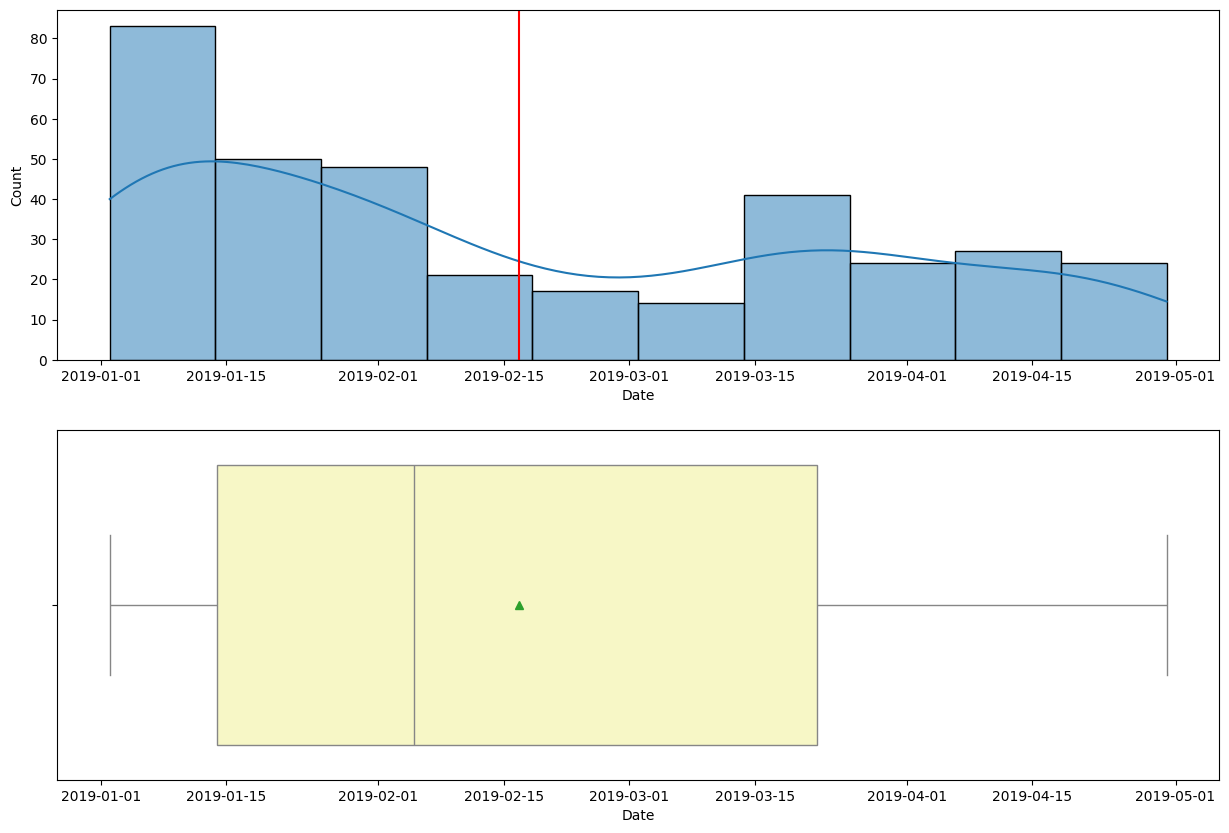

In [43]:
# plot_countplot("Date")
plot_histogram_countplot_boxplot("Date", histplot=True);

* This is a Right Skewed distribution which tell us that there are many news articles in the start of the year

### Date - Day

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\529874088.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);


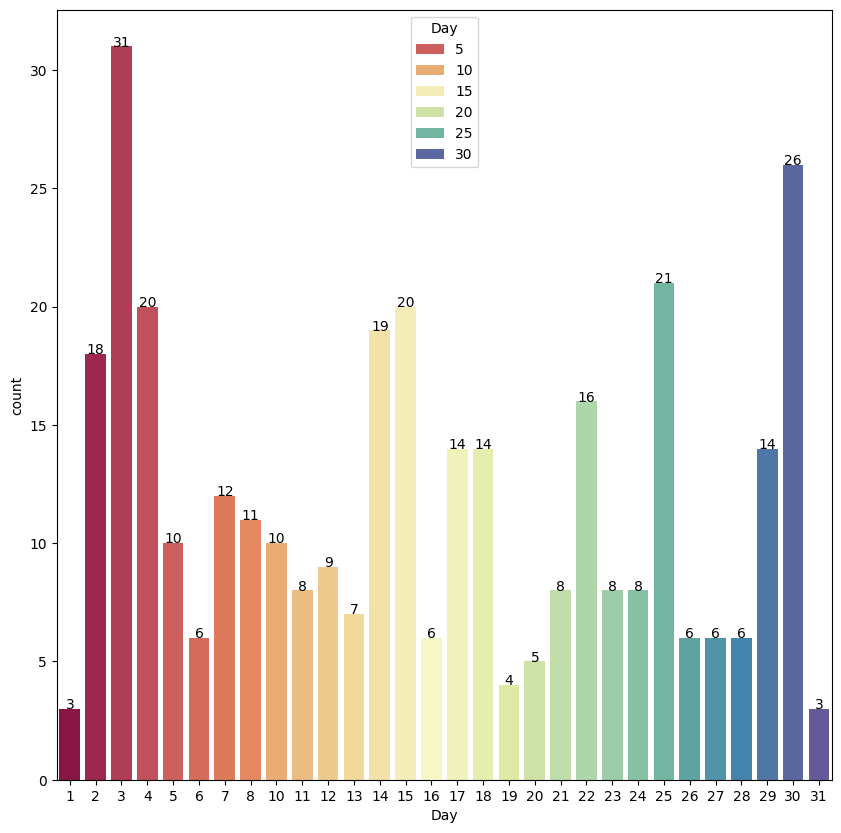

In [ ]:
plot_countplot("Day")

* This graph tells us that the most number of news were released in initial and final days of the month.

### Date - Month

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\529874088.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);


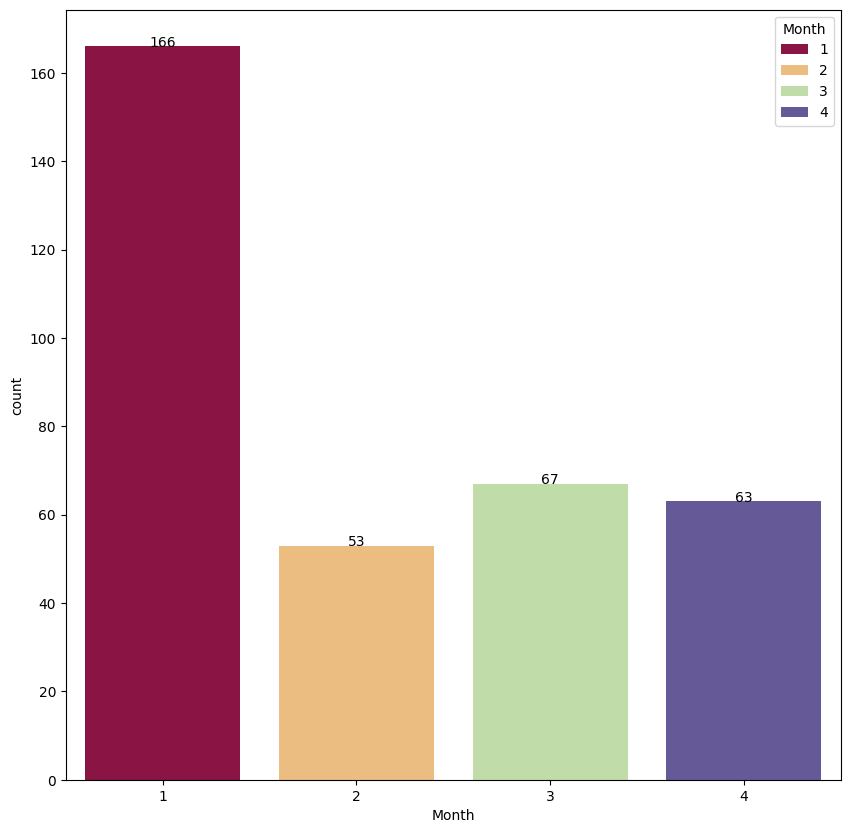

In [ ]:
plot_countplot("Month")

* The company was able to collect majority of the news articles from January Month only.

#### Open

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Open', ylabel='Count'>

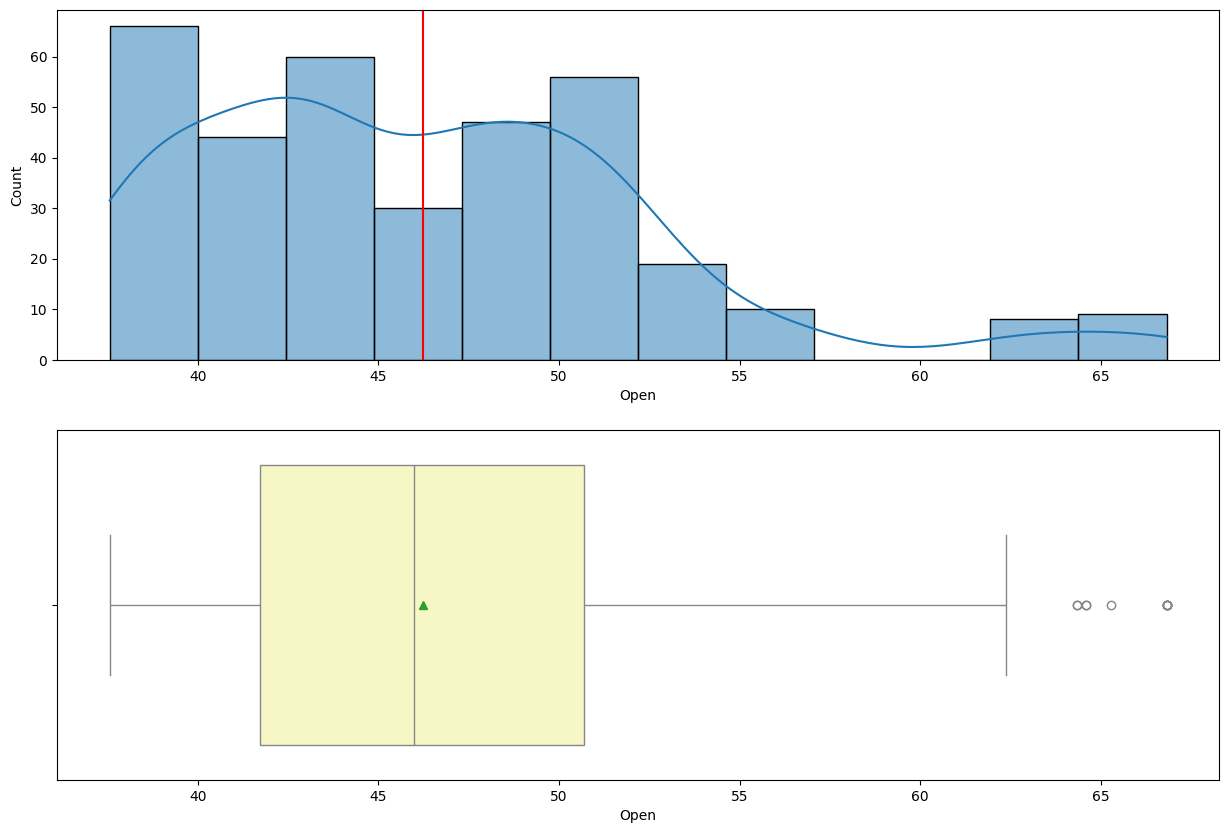

In [ ]:
plot_histogram_countplot_boxplot("Open", histplot=True)

* This is a right skewed distribution, with very little outliers present above the 62 mark.

### High

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='High', ylabel='Count'>

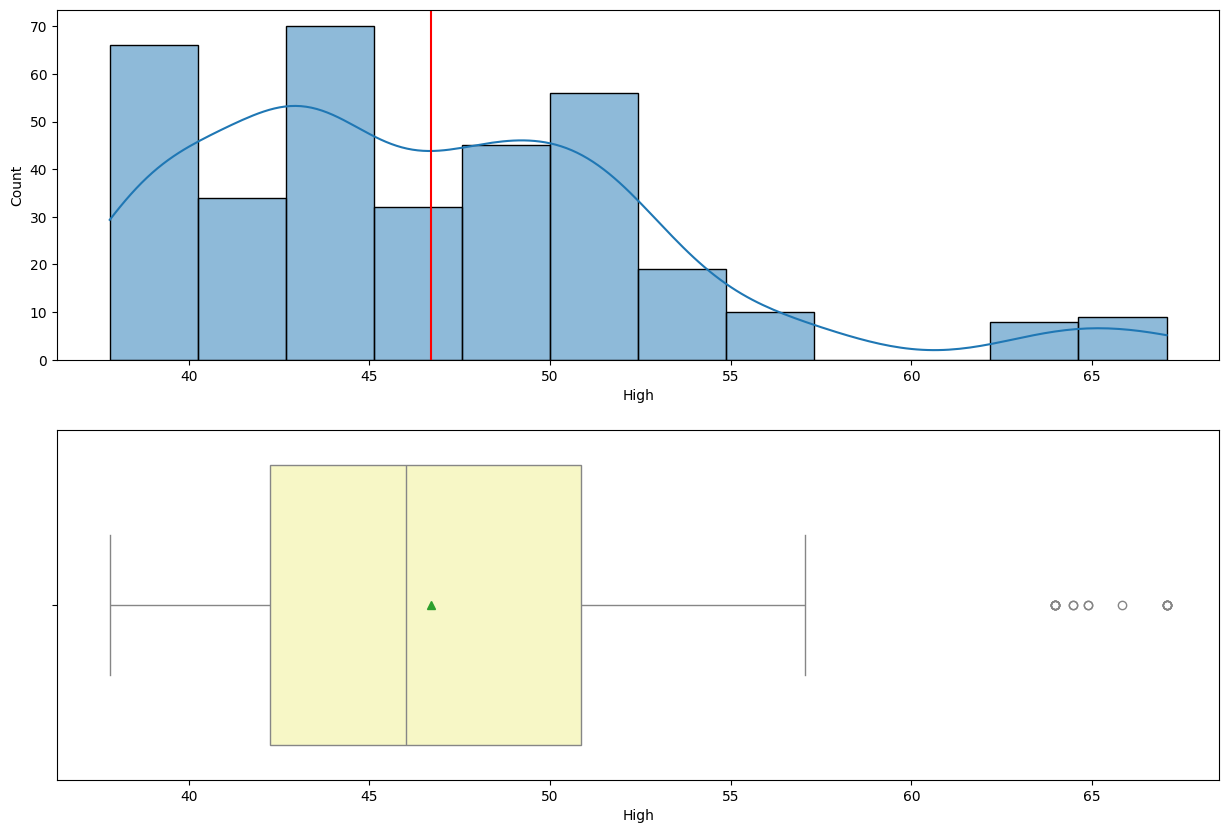

In [ ]:
plot_histogram_countplot_boxplot("High", histplot=True)

The distribution of the "High" values is moderately right-skewed with several high-value outliers above 60, while most data points are concentrated between 40 and 55.

### Low

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Low', ylabel='Count'>

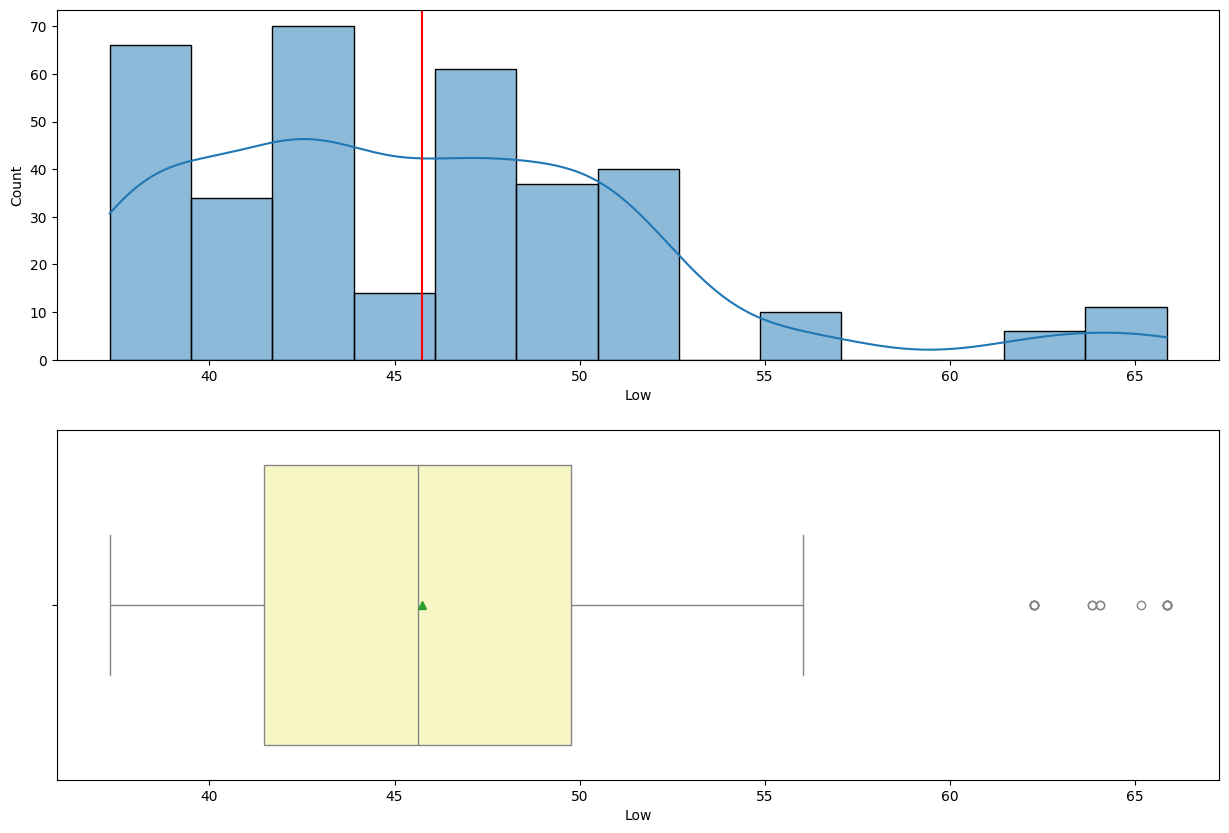

In [ ]:
plot_histogram_countplot_boxplot("Low", histplot=True)

The distribution of "Low" values is slightly right-skewed with a concentration between 40 and 50, and a few high-value outliers above 60.

### Close

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Close', ylabel='Count'>

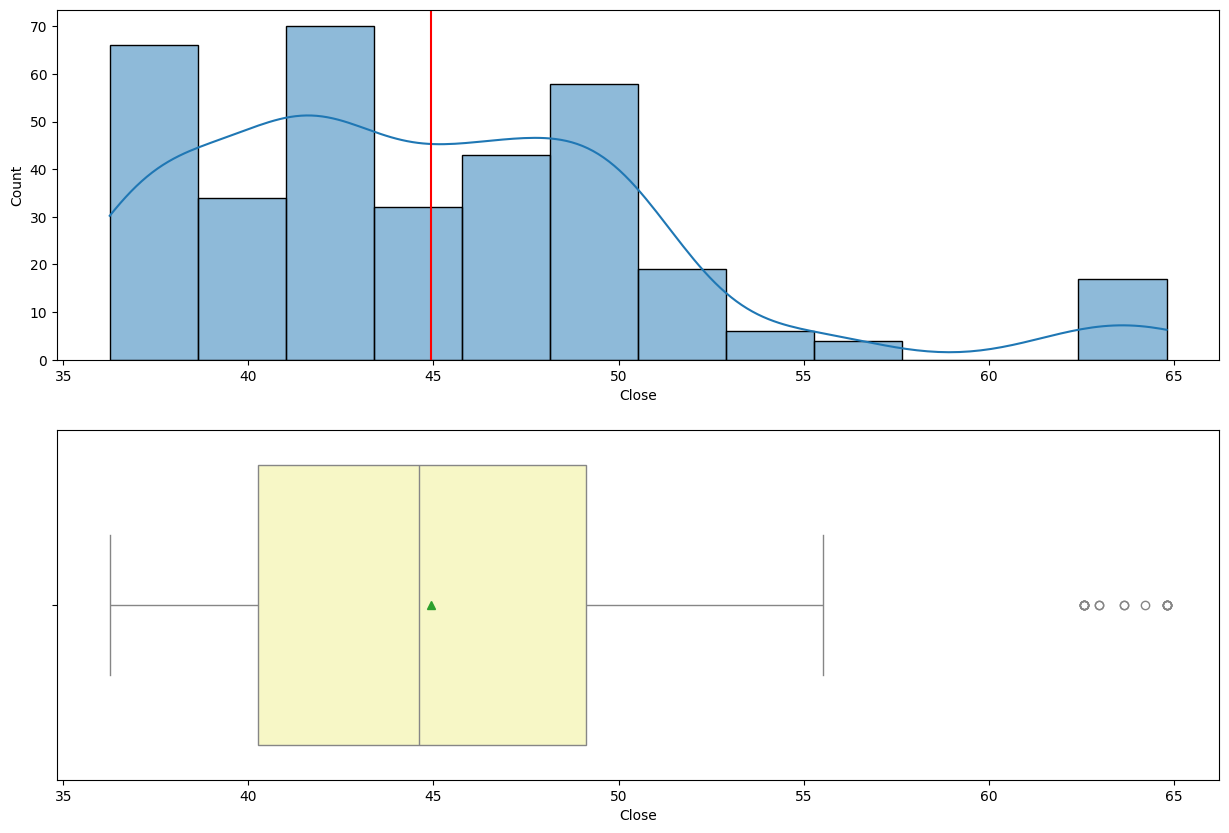

In [ ]:
plot_histogram_countplot_boxplot("Close", histplot=True)

* This is a right skewed distribution, with outliers present above the 55 mark.

### Volume

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Volume', ylabel='Count'>

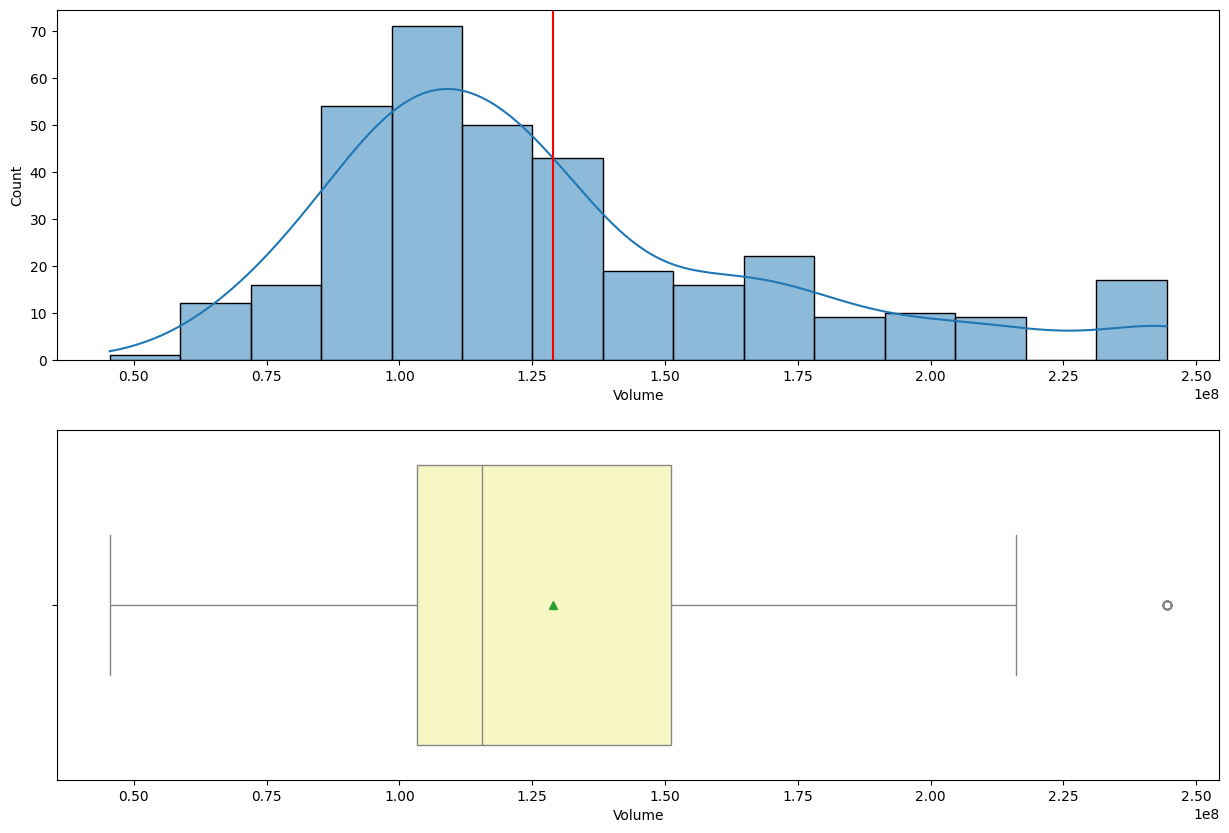

In [ ]:
plot_histogram_countplot_boxplot("Volume", histplot=True)

The "Volume" distribution is moderately right-skewed, with most values clustered around 100 to 150 million and a few extreme outliers above 250 million

### Label

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\529874088.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);


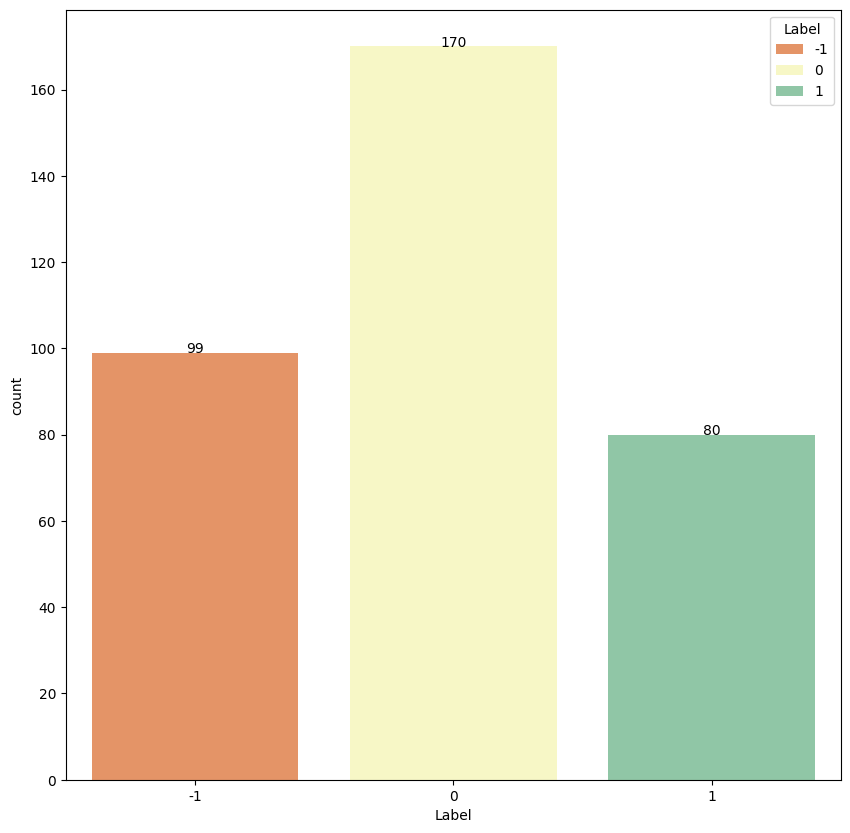

In [ ]:
plot_countplot("Label")

* Out of 349, 170 news articles are Neutral
* There is a similar distribution between negative and positive news articles
* 99 news articles have negative sentiment and 80 news articles have positive sentiment

### Length of News Content by Words

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Length_of_News_Content_by_Words', ylabel='Count'>

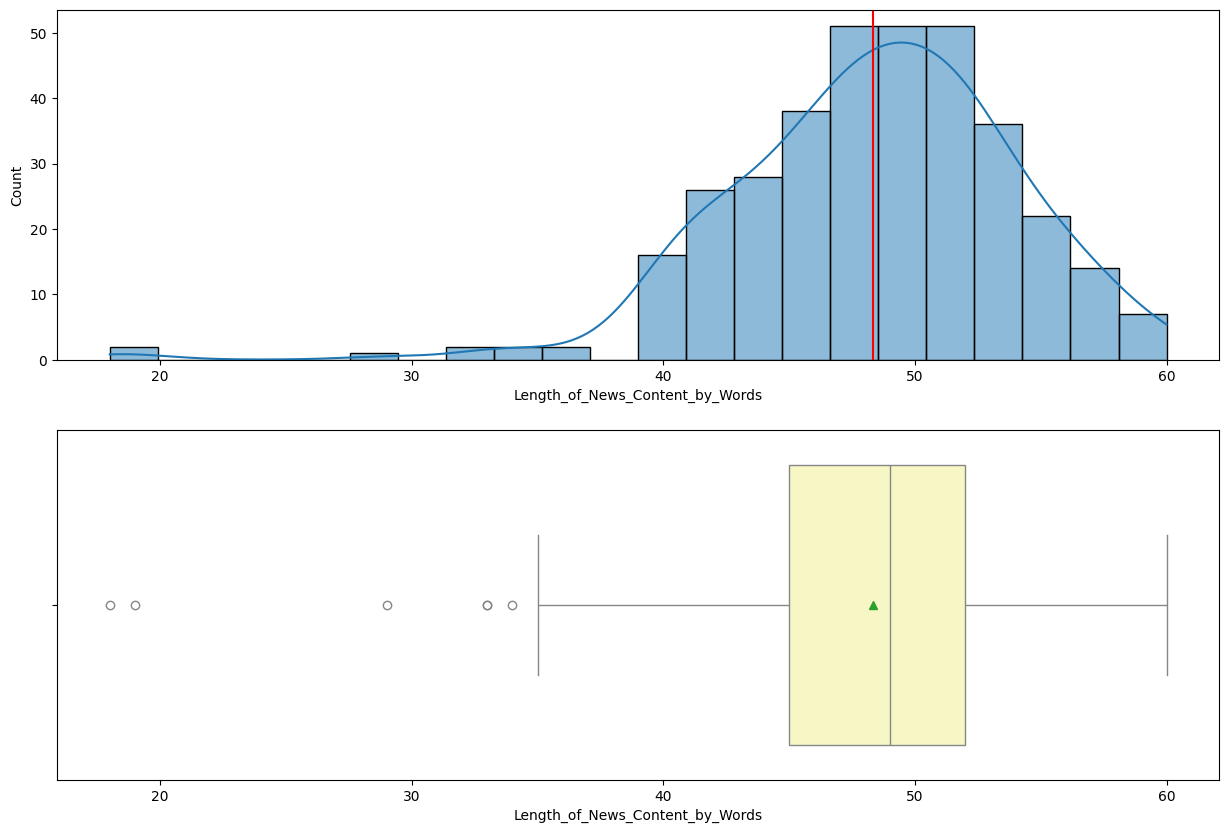

In [ ]:
data["Length_of_News_Content_by_Words"] = data["News"].apply(lambda x: len(x.split()))
plot_histogram_countplot_boxplot("Length_of_News_Content_by_Words", histplot=True)

* On an average, each news article contains approximatey 48 words.
* However, There are many outliers on the left side of the curve, indicating that very very less news articles have words less than 35.
* There are no articles containing more than 65 words

### Length_of_News_Content_by_characters

C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
C:\Users\Etisha\AppData\Local\Temp\ipykernel_114388\3579908545.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")


<Axes: xlabel='Length_of_News_Content_by_characters', ylabel='Count'>

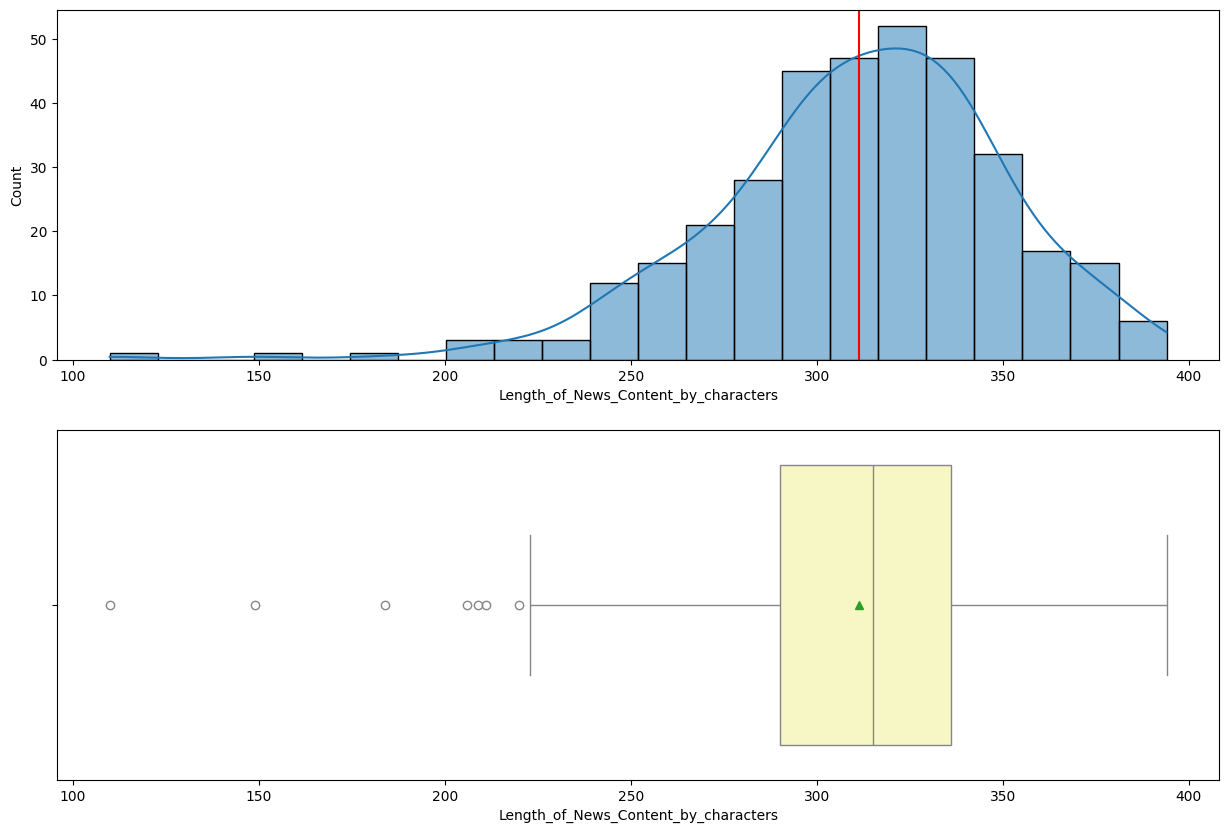

In [ ]:
data["Length_of_News_Content_by_characters"] = data["News"].apply(lambda x: len(x))
plot_histogram_countplot_boxplot("Length_of_News_Content_by_characters", histplot=True)

Both the distributions of Length of News Content follows a similar distribution and hence follow similar observations

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [ ]:
data.columns

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label',
       'Day', 'Month', 'Length_of_News_Content_by_Words',
       'Length_of_News_Content_by_characters'],
      dtype='object')

### Bivariate analysis between numerical variables

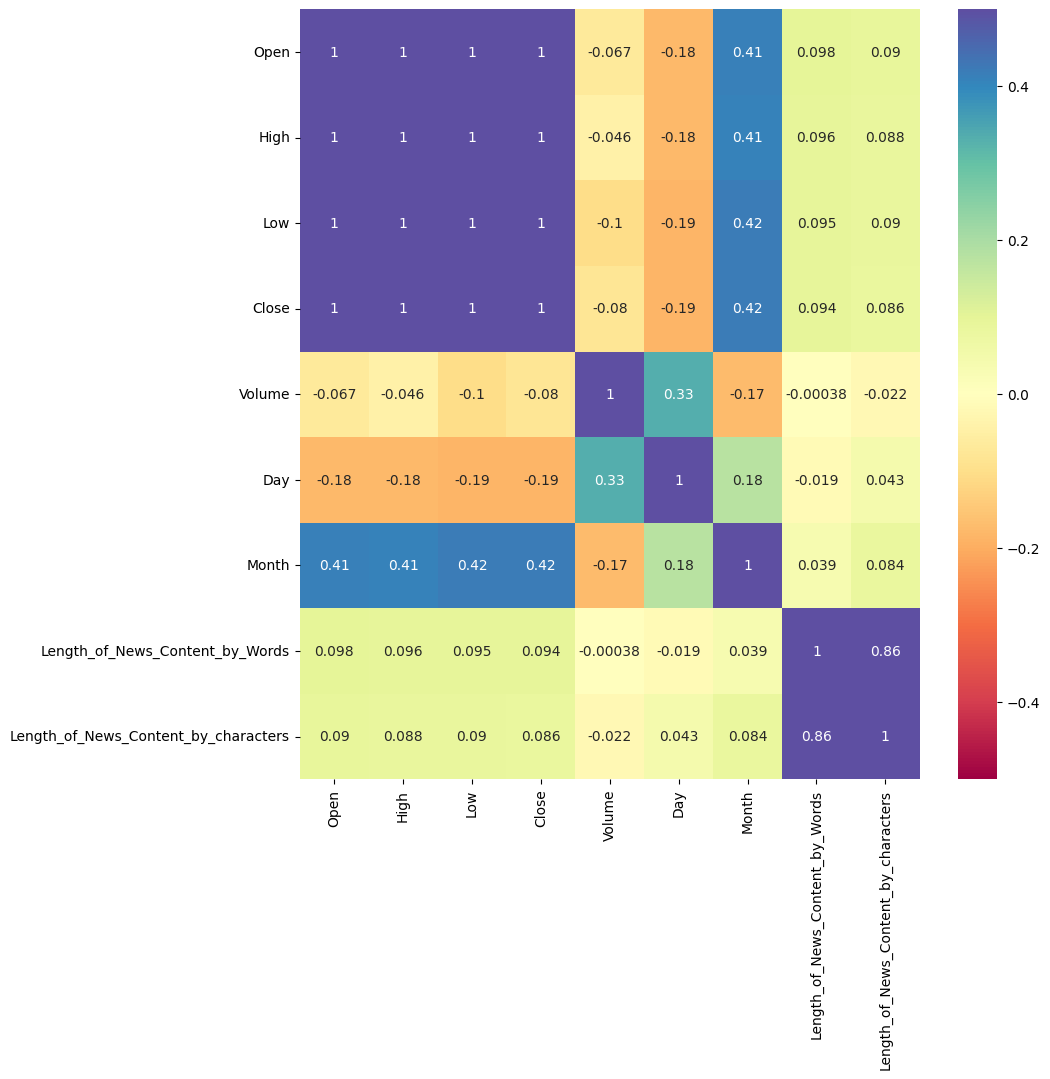

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-0.5, vmax=0.5);
plt.show()

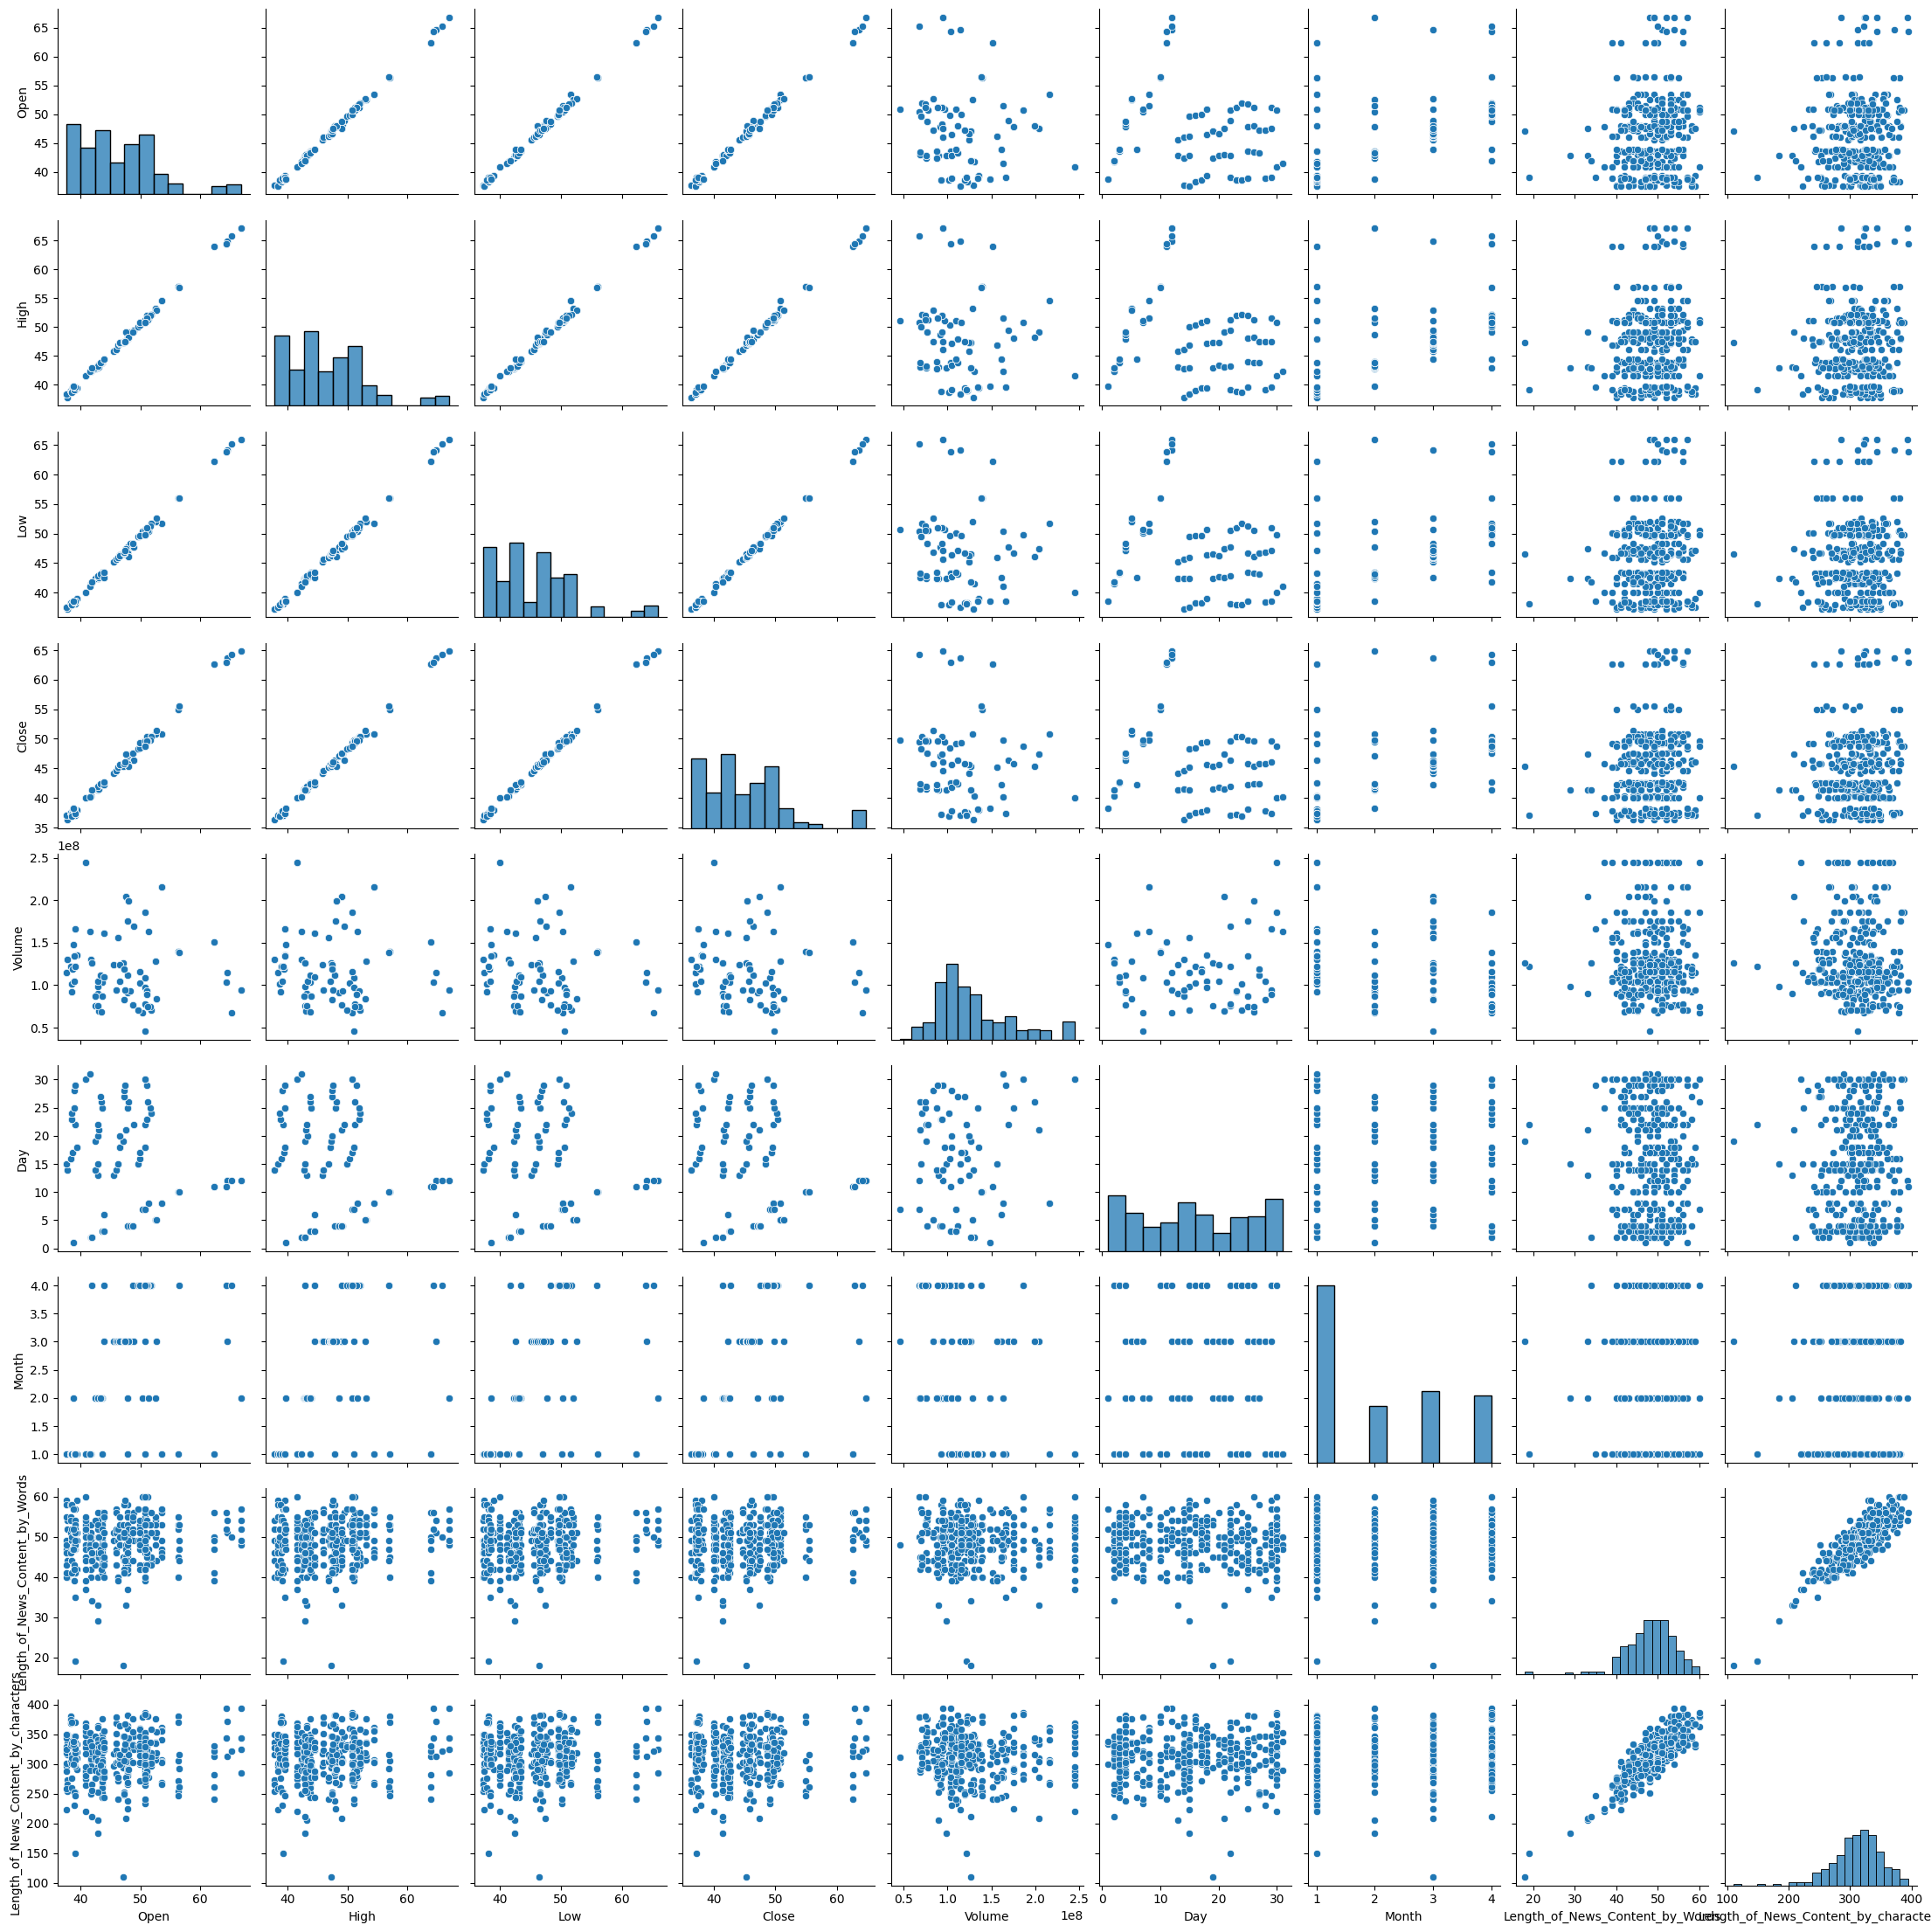

In [ ]:
sns.pairplot(data)

As visible from the correlation as well as pairplot, these are the following observations:
* Open, High, Low and Close values are perfectly correlated hence using all the variables is not neccesary in the sentiment analysis
* As visible from the pairplot, heatmap and the univariate analysis, Length of News Content by words as well as by characters are also highly correlated.
* However Open, High, Low and Close variables are not correlated to the Length of news content.

### Pairplot w.r.t to labels

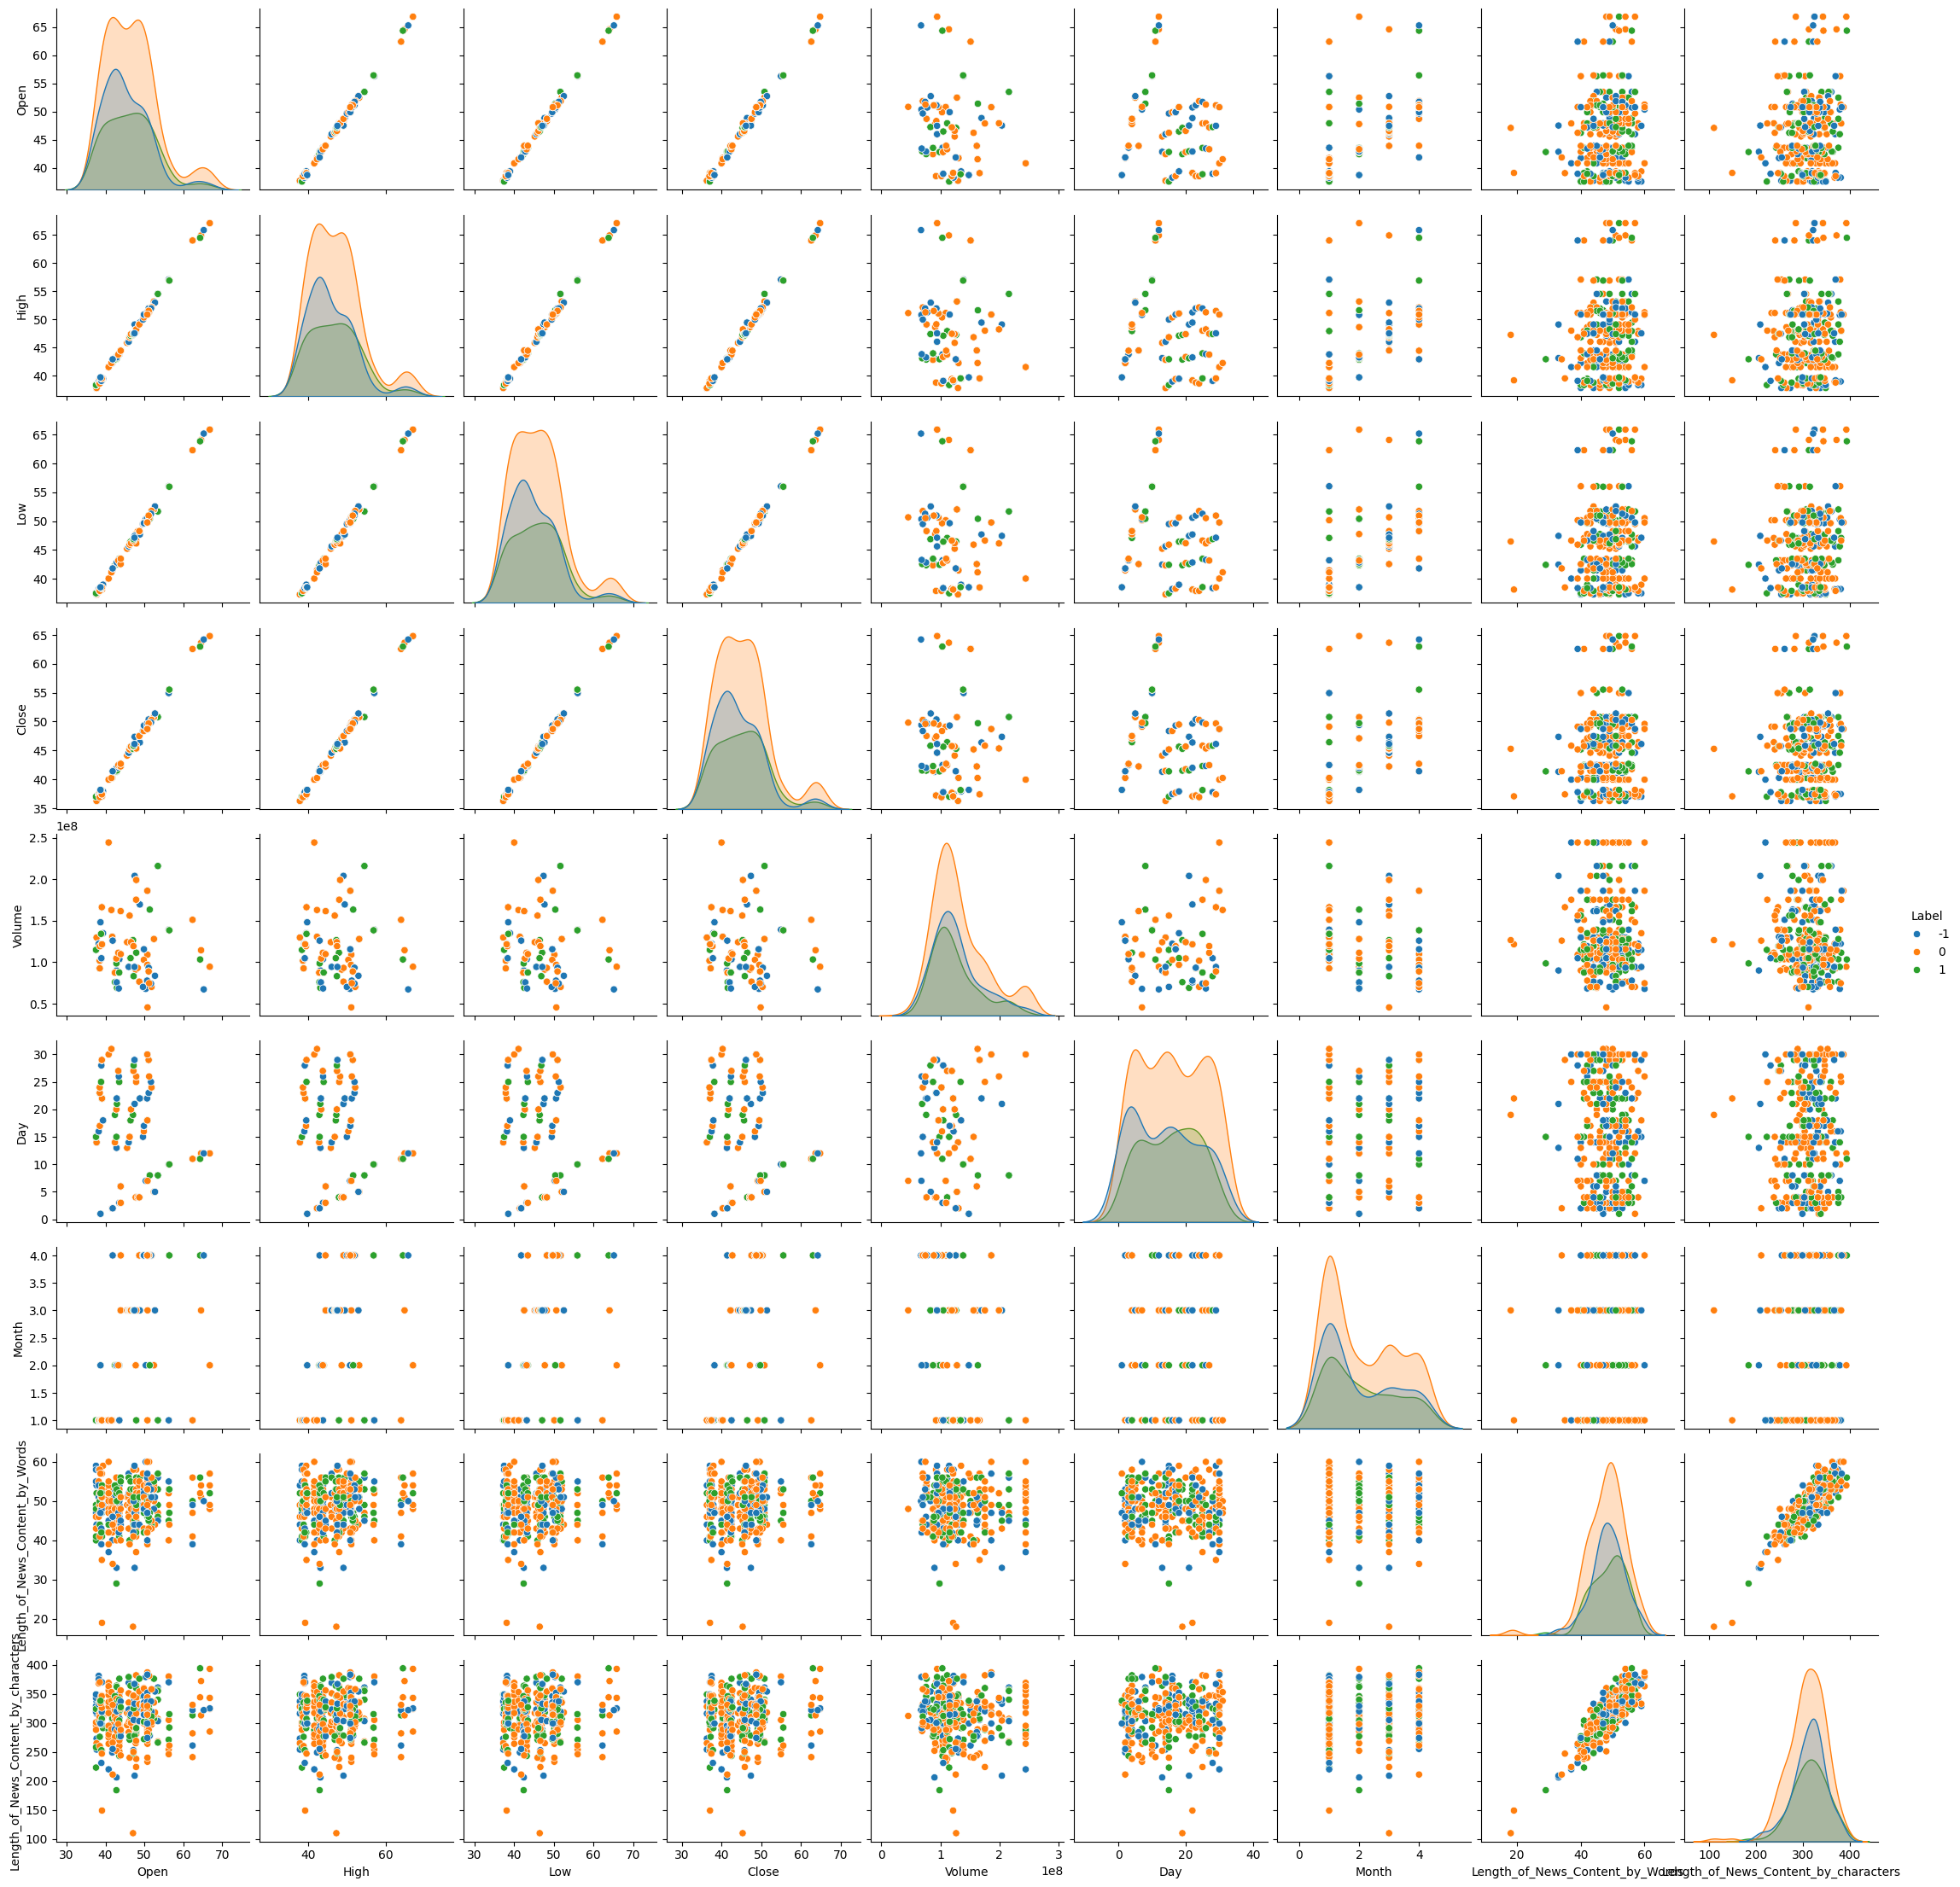

In [ ]:
sns.pairplot(data, hue="Label")

### Date vs Price

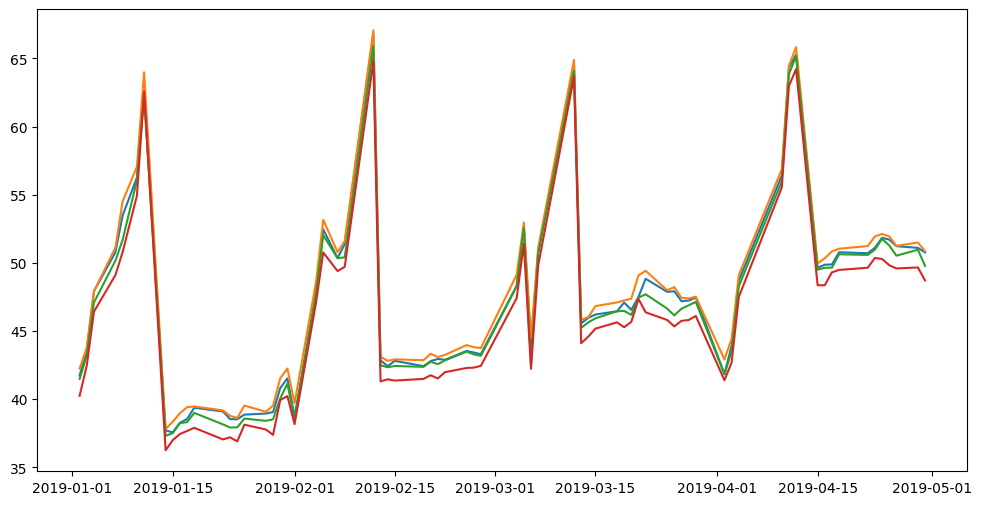

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data[["Open", "High", "Low", "Close"]]);

### Prices changes w.r.t Sentiment(Negative or -1)

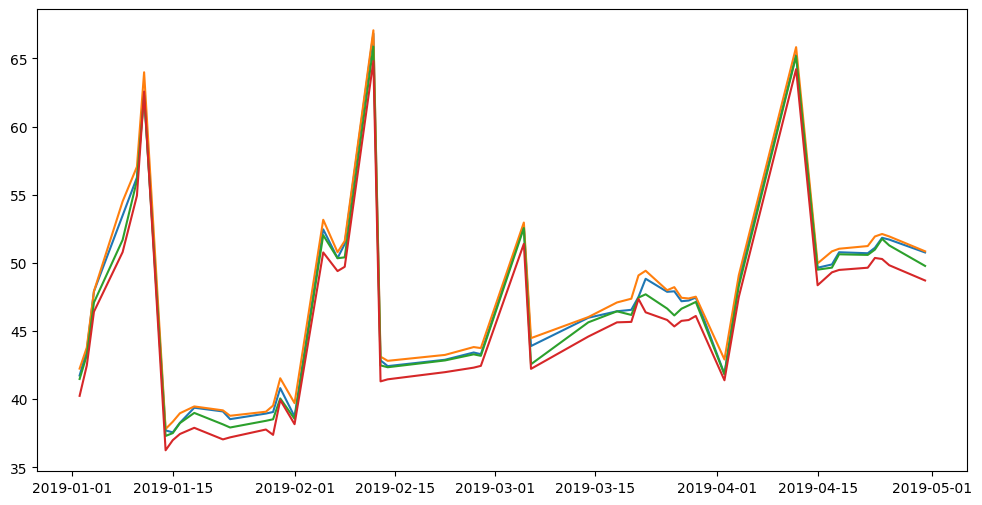

In [ ]:
negative_df = data[data["Label"]==-1]
plt.figure(figsize=(12, 6))
plt.plot(negative_df["Date"], negative_df[["Open", "High", "Low", "Close"]]);

### Prices changes w.r.t Sentiment(Neutral or 0)

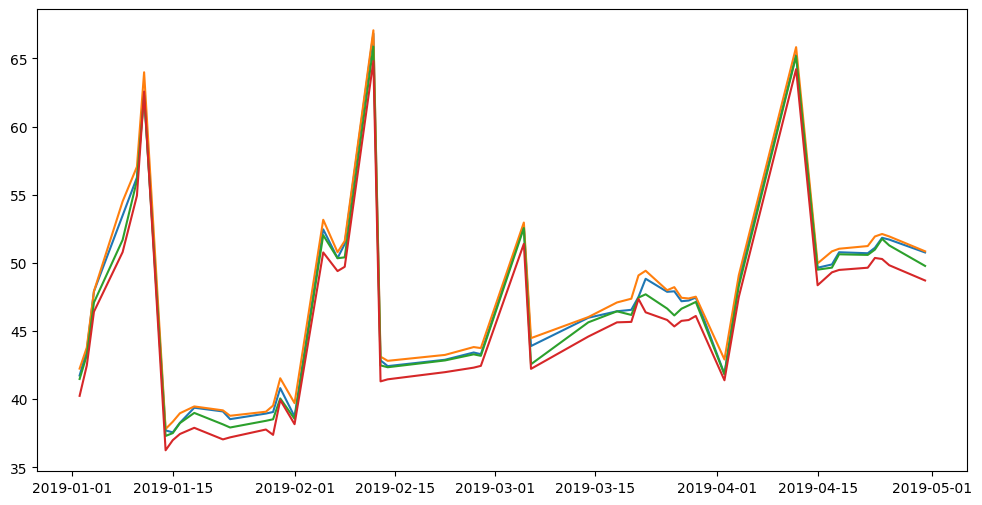

In [ ]:
neural_df = data[data["Label"]==0]
plt.figure(figsize=(12, 6))
plt.plot(negative_df["Date"], negative_df[["Open", "High", "Low", "Close"]]);

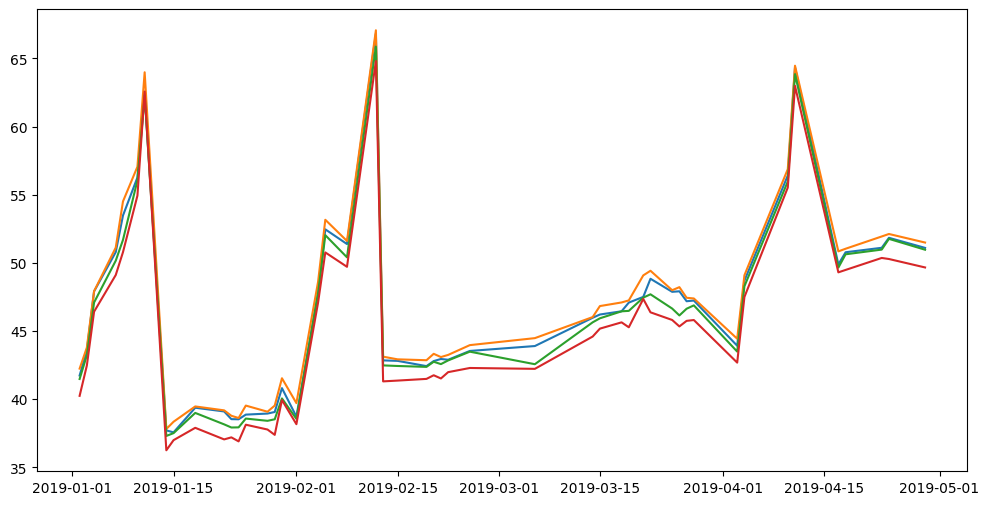

In [ ]:
positive_df = data[data["Label"]==1]
plt.figure(figsize=(12, 6))
plt.plot(positive_df["Date"], positive_df[["Open", "High", "Low", "Close"]]);

Here are two key observations from the pairplot:

* **Strong Positive Correlation**: The features Open, High, Low, and Close are highly positively correlated with each other across all label classes, indicating they move together in the same direction.

* **Class Separation is Limited**: There is no strong visual separation between the label classes (-1, 0, 1) across most numerical features, suggesting that these features alone may not be highly discriminative for classification.

## **Data Preprocessing**

In [44]:
# Loading the Lemmatizer
lm = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([lm.lemmatize(word) for word in words])

    return text

In [45]:
data["News_cleaned"] = data["News"].apply(preprocess_text)
data.head()

Date                                               News       Open  \
0 2019-01-02   The tech sector experienced a significant dec...  41.740002   
1 2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2 2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3 2019-01-02   This news article reports that yields on long...  41.740002   
4 2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume Label  Day  Month  \
0  42.244999  41.482498  40.246914  130672400    -1    2      1   
1  42.244999  41.482498  40.246914  130672400    -1    2      1   
2  42.244999  41.482498  40.246914  130672400    -1    2      1   
3  42.244999  41.482498  40.246914  130672400    -1    2      1   
4  42.244999  41.482498  40.246914  130672400    -1    2      1   

                                        News_cleaned  
0  the tech sector experienced a significant decl...  
1  apple lowered it fiscal q revenue guidance to ...  
2  apple cut it fiscal first quarter revenue fore...  
3  this news article report that yield on longdat...  
4  apple revenue warning led to a decline in usd ...

## **Word Embeddings**

### Word Embeddings using Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in data["News_cleaned"].values]

In [ ]:
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 3150


In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(data["News_cleaned"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0     0.022980   0.083207   0.037710   0.106214  -0.020045  -0.123825   
1     0.023328   0.084973   0.037822   0.109058  -0.020711  -0.126637   
2     0.020908   0.074222   0.033298   0.095303  -0.018423  -0.110834   
3     0.024531   0.087627   0.039300   0.111559  -0.021071  -0.130012   
4     0.023463   0.084668   0.037905   0.108460  -0.020543  -0.126270   
..         ...        ...        ...        ...        ...        ...   
344   0.014115   0.051753   0.023229   0.066146  -0.012502  -0.077730   
345   0.016075   0.057425   0.025204   0.073014  -0.014232  -0.084967   
346   0.018115   0.065213   0.029379   0.083162  -0.016161  -0.097306   
347   0.021343   0.077287   0.034305   0.098199  -0.018383  -0.114699   
348   0.022640   0.081517   0.036849   0.103354  -0.019318  -0.120930   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 290  \
0     0.103902   0.281123   0.035681  -0.043817  ...     0.056875   
1     0.105280   0.286859   0.036536  -0.045025  ...     0.058277   
2     0.092391   0.251025   0.032222  -0.039585  ...     0.050468   
3     0.108787   0.294508   0.037482  -0.046439  ...     0.059883   
4     0.105171   0.286158   0.037069  -0.045004  ...     0.057726   
..         ...        ...        ...        ...  ...          ...   
344   0.064316   0.174870   0.022825  -0.027779  ...     0.035445   
345   0.071343   0.192034   0.024581  -0.029731  ...     0.039275   
346   0.081671   0.220625   0.028626  -0.034624  ...     0.043757   
347   0.095541   0.259036   0.033058  -0.040468  ...     0.052116   
348   0.100583   0.274280   0.034963  -0.043161  ...     0.055635   

     Feature 291  Feature 292  Feature 293  Feature 294  Feature 295  \
0       0.129188     0.124810    -0.018945     0.154466     0.161576   
1       0.131860     0.127133    -0.018932     0.157152     0.165248   
2       0.115699     0.111613    -0.016993     0.137911     0.144277   
3       0.136545     0.131206    -0.019616     0.161217     0.169615   
4       0.131838     0.127355    -0.018828     0.157408     0.164536   
..           ...          ...          ...          ...          ...   
344     0.080798     0.077753    -0.011219     0.095818     0.100562   
345     0.089047     0.085763    -0.013249     0.105151     0.111199   
346     0.102718     0.098641    -0.014594     0.120871     0.126830   
347     0.120534     0.115513    -0.017357     0.142216     0.149327   
348     0.126778     0.121684    -0.018194     0.150695     0.157099   

     Feature 296  Feature 297  Feature 298  Feature 299  
0       0.027189    -0.064214     0.091419    -0.024949  
1       0.027154    -0.065447     0.093144    -0.025864  
2       0.023641    -0.057222     0.081360    -0.022744  
3       0.028194    -0.067125     0.096054    -0.026864  
4       0.027184    -0.064560     0.092891    -0.025420  
..           ...          ...          ...          ...  
344     0.016812    -0.039645     0.057163    -0.016100  
345     0.018494    -0.043400     0.062994    -0.017408  
346     0.020895    -0.049730     0.071856    -0.019988  
347     0.024481    -0.058858     0.084481    -0.023197  
348     0.026063    -0.062296     0.089226    -0.024663  

[349 rows x 300 columns]

### Word Embeddings using GloVE

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
glove_words = glove_model.index_to_key
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector


In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(data["News_cleaned"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0     0.010066   0.006283   0.204096  -0.047489   0.103704  -0.299888   
1     0.056161   0.217672   0.296949  -0.004053   0.081435  -0.409013   
2     0.006126   0.145449   0.364515  -0.085331   0.193630  -0.395491   
3    -0.088574   0.076439   0.437153   0.005138   0.080272  -0.199802   
4     0.006438   0.132159   0.292785   0.035018   0.084045  -0.173308   
..         ...        ...        ...        ...        ...        ...   
344  -0.080761   0.106763   0.302943  -0.177087   0.112568   0.196048   
345   0.251641   0.173199   0.248777   0.071998   0.119760  -0.376565   
346   0.052532   0.047579   0.347137  -0.144127   0.121111  -0.141004   
347  -0.098595   0.047691   0.333035  -0.064930   0.096749  -0.312929   
348   0.000431   0.139475   0.321864  -0.072053   0.083573  -0.251017   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0    -0.068828   0.020817  -0.129405  -0.008071  ...    0.046957    0.109230   
1    -0.132043  -0.082815  -0.116870   0.063732  ...    0.036634    0.175385   
2    -0.154999  -0.020482  -0.096695   0.013861  ...    0.122389    0.125160   
3    -0.202338   0.086932  -0.139416   0.043925  ...    0.133389    0.141633   
4    -0.134349  -0.159743  -0.195232   0.117458  ...    0.118557    0.136716   
..         ...        ...        ...        ...  ...         ...         ...   
344  -0.084803   0.179529  -0.066396   0.025801  ...    0.079437   -0.091020   
345  -0.254574  -0.054797  -0.173315  -0.069455  ...    0.063946    0.102366   
346  -0.090298   0.021801  -0.285803  -0.064482  ...   -0.024805    0.126004   
347  -0.225052   0.038295  -0.287012  -0.080384  ...    0.045243    0.007384   
348  -0.004701   0.077826  -0.181611   0.008853  ...    0.045706    0.115450   

     Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0     -0.351235    0.037833   -0.427816    0.047666   -0.049342   -0.136782   
1     -0.331301   -0.192157   -0.482685    0.101879    0.045898   -0.199031   
2     -0.171782   -0.227086   -0.556755    0.116691   -0.018195   -0.147639   
3     -0.339484    0.165961   -0.471941    0.050743   -0.029675   -0.322201   
4     -0.244101   -0.142594   -0.316145    0.111253   -0.002667   -0.204314   
..          ...         ...         ...         ...         ...         ...   
344    0.013105    0.115229   -0.413042    0.027157   -0.107761   -0.263499   
345   -0.127806    0.108562   -0.614936    0.384140    0.105726   -0.106545   
346   -0.303820    0.096408   -0.450919    0.019951   -0.104385   -0.232029   
347   -0.258756   -0.047810   -0.517464    0.048373    0.116140   -0.307055   
348   -0.207618    0.231447   -0.505404    0.050111   -0.026768   -0.246670   

     Feature 98  Feature 99  
0      0.602375   -0.020381  
1      0.682361   -0.019791  
2      0.633574   -0.080224  
3      0.610073    0.015090  
4      0.514576   -0.052939  
..          ...         ...  
344    0.505072    0.269610  
345    0.541160    0.082377  
346    0.504080    0.137247  
347    0.641075    0.053715  
348    0.743549   -0.153996  

[349 rows x 100 columns]

### Word Embeddings using Sentence Transformer

In [ ]:
# Deep Learning library
import torch

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
embeddings = model.encode(data["News_cleaned"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
df_SBERT = pd.DataFrame(embeddings, columns=[f'Feature {i}' for i in range(embeddings.shape[1])])

In [ ]:
df_SBERT

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.002741  -0.008577   0.070467   0.019920   0.015843   0.003050   
1     0.034120   0.085610   0.111728   0.054172  -0.027840   0.055026   
2     0.028444   0.018161   0.129263   0.036497   0.037187  -0.002269   
3    -0.008690   0.062951   0.003787   0.053097   0.025330  -0.003166   
4     0.003993   0.038671  -0.021100   0.065267   0.017961   0.038938   
..         ...        ...        ...        ...        ...        ...   
344   0.029061  -0.037157   0.013236   0.103196  -0.058263   0.012185   
345   0.037286  -0.015251   0.069439   0.044728   0.026587   0.068851   
346  -0.033019  -0.079209   0.031006   0.029671   0.008027   0.058073   
347  -0.008360   0.004722  -0.044597   0.102615   0.097624   0.013138   
348  -0.030088   0.084270   0.007350  -0.002919   0.023128  -0.016811   

     Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0     0.036057   0.066240   0.064147   0.016518    0.061166    0.053467   
1     0.020526   0.063291   0.080802   0.046817    0.055122    0.061695   
2     0.003085   0.017510  -0.004004   0.029860    0.097346    0.042647   
3    -0.027131   0.074654  -0.040038   0.012678    0.037258    0.096256   
4     0.116317   0.115426   0.057217  -0.003858    0.012008   -0.018482   
..         ...        ...        ...        ...         ...         ...   
344   0.079869  -0.015767  -0.029073   0.001331    0.013671    0.001985   
345  -0.031328   0.025602   0.018389  -0.088739   -0.053687   -0.050661   
346  -0.033714   0.060003  -0.019982   0.004674    0.041416    0.112294   
347  -0.038348  -0.032844   0.064971  -0.042074   -0.035632    0.075971   
348  -0.032515   0.139352   0.005908  -0.005956    0.034963    0.038070   

     Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0      0.062165   -0.001141    0.008323   -0.032167   -0.011628   -0.103425   
1      0.045589   -0.012805    0.015724    0.007182   -0.010420   -0.047380   
2     -0.040643   -0.027242    0.048876   -0.052443   -0.020294   -0.092572   
3     -0.003987    0.006494    0.028820    0.031775    0.020178   -0.021297   
4      0.047472    0.025349    0.011354   -0.052914   -0.033841   -0.043822   
..          ...         ...         ...         ...         ...         ...   
344    0.020824   -0.085577   -0.065635    0.033927    0.125887    0.018717   
345   -0.010964    0.010750   -0.074322   -0.080280   -0.087373   -0.001924   
346   -0.018863   -0.090222    0.006925    0.025936    0.005523   -0.095949   
347   -0.062331   -0.053963    0.028153    0.007000   -0.040354   -0.024168   
348    0.105934   -0.006251    0.040878   -0.044093    0.021816   -0.038152   

     Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0     -0.043626   -0.049434   -0.027238   -0.035121   -0.040930    0.024796   
1     -0.088288   -0.029395    0.026262    0.026018   -0.014030    0.016998   
2     -0.046868   -0.062114   -0.051315    0.000463   -0.007219    0.019957   
3     -0.052805    0.064532   -0.019756    0.028194    0.012998   -0.007218   
4     -0.055570    0.023184    0.009028   -0.012226   -0.009302    0.019848   
..          ...         ...         ...         ...         ...         ...   
344   -0.029607    0.071746   -0.022708    0.034444    0.054082    0.044834   
345   -0.002972    0.021041   -0.072928   -0.069251   -0.085190    0.018650   
346   -0.006629   -0.073289   -0.031369   -0.023328    0.025042    0.052032   
347   -0.030104    0.031581   -0.099286    0.014533   -0.014289    0.014799   
348   -0.014893   -0.006523    0.023355   -0.076121   -0.004103   -0.032767   

     Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0      0.078924    0.009553   -0.016814    0.045967   -0.041583   -0.018891   
1      0.060821   -0.020055   -0.083747    0.033297   -0.011439   -0.019818   
2      0.088651   -0.014388   -0.047696   -0.068749   -0.055345   -0.017012   
3      0.0130

## **Sentiment Analysis**

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### **Random Forest Classifier with Word2Vec**

In [ ]:
# Storing independent variable
X_w2v = df_Word2Vec.copy()

# Storing target variable
y_w2v = data.Label

In [ ]:
# Split data into training and testing set.
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X ,y, test_size = 0.25, random_state = 42, stratify=y)

In [ ]:
# Building the model

# rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 11, random_state = 42)
rf_word2vec = RandomForestClassifier(class_weight= "balanced",random_state = 42)
# Fitting on train data
rf_word2vec.fit(X_train_w2v, y_train_w2v)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_w2v = rf_word2vec.predict(X_train_w2v)

# Predicting on test data
y_pred_test_w2v = rf_word2vec.predict(X_test_w2v)

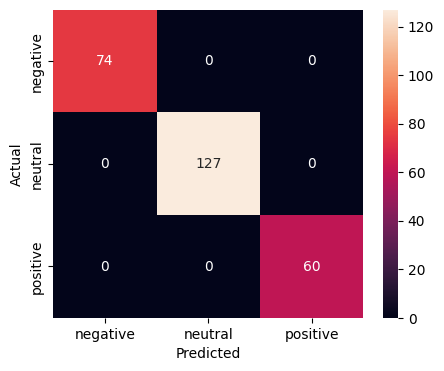

In [ ]:
plot_confusion_matrix(y_train_w2v, y_pred_train_w2v)

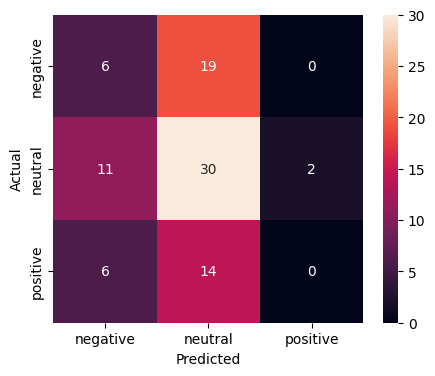

In [ ]:
plot_confusion_matrix(y_test_w2v, y_pred_test_w2v)

**Classification**

In [ ]:
print(classification_report(y_train_w2v,y_pred_train_w2v))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        60

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [ ]:
print(classification_report(y_test_w2v,y_pred_test_w2v))

              precision    recall  f1-score   support

          -1       0.26      0.24      0.25        25
           0       0.48      0.70      0.57        43
           1       0.00      0.00      0.00        20

    accuracy                           0.41        88
   macro avg       0.25      0.31      0.27        88
weighted avg       0.31      0.41      0.35        88



#### **RF Tuned with Grid Search**

In [ ]:
# Choose the type of classifier.
word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,120,25),
    'max_features': [0.5,0.7]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_w2v, y_train_w2v)

# Set the clf to the best combination of parameters
word2vec_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
word2vec_rf_tuned.fit(X_train_w2v, y_train_w2v)

c:\Users\Etisha\anaconda3\envs\electrical_llama\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_w2v_tuned = word2vec_rf_tuned.predict(X_train_w2v)

# Predicting on test data
y_pred_test_w2v_tuned = word2vec_rf_tuned.predict(X_test_w2v)

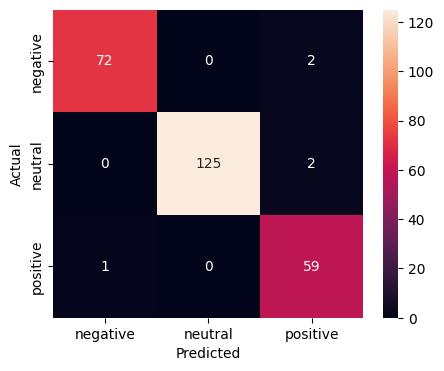

In [ ]:
plot_confusion_matrix(y_train_w2v, y_pred_train_w2v_tuned)

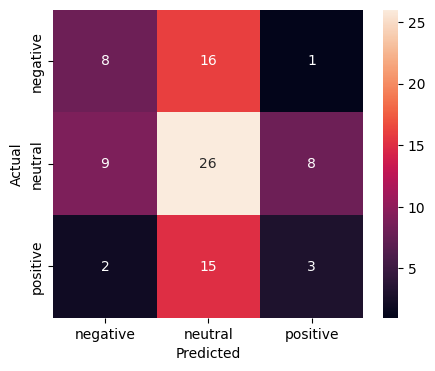

In [ ]:
plot_confusion_matrix(y_test_w2v, y_pred_test_w2v_tuned)

**Classification**

In [ ]:
print(classification_report(y_train_w2v,y_pred_train_w2v_tuned))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        74
           0       1.00      0.98      0.99       127
           1       0.94      0.98      0.96        60

    accuracy                           0.98       261
   macro avg       0.97      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



In [ ]:
print(classification_report(y_test_w2v,y_pred_test_w2v_tuned))

              precision    recall  f1-score   support

          -1       0.42      0.32      0.36        25
           0       0.46      0.60      0.52        43
           1       0.25      0.15      0.19        20

    accuracy                           0.42        88
   macro avg       0.38      0.36      0.36        88
weighted avg       0.40      0.42      0.40        88



### **Random Forest Classifier with GloVe**

In [ ]:
# Storing independent variable
X_glove = df_Glove.copy()

# Storing target variable
y_glove = data.Label

# Split data into training and testing set.
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove ,y_glove, test_size = 0.25, random_state = 42, stratify=y_glove)

In [ ]:
# Building the model

rf_glove = RandomForestClassifier(n_estimators = 100, max_depth = 11, random_state = 42)
# Fitting on train data
rf_glove.fit(X_train_glove, y_train_glove)


RandomForestClassifier(max_depth=11, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_glove.predict(X_train_glove)

# Predicting on test data
y_pred_test_glove = rf_glove.predict(X_test_glove)

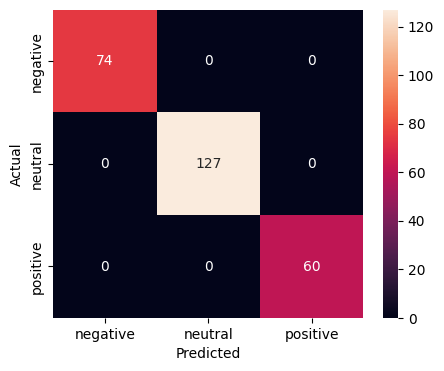

In [ ]:
plot_confusion_matrix(y_train_glove, y_pred_train_glove)

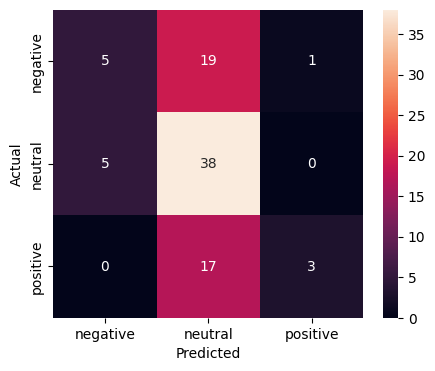

In [ ]:
plot_confusion_matrix(y_test_glove, y_pred_test_glove)

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        60

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [ ]:
print(classification_report(y_test_glove, y_pred_test_glove))

              precision    recall  f1-score   support

          -1       0.50      0.20      0.29        25
           0       0.51      0.88      0.65        43
           1       0.75      0.15      0.25        20

    accuracy                           0.52        88
   macro avg       0.59      0.41      0.40        88
weighted avg       0.56      0.52      0.46        88



#### **RF Tuned with Grid Search**

In [ ]:
# Choose the type of classifier.
glove_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,120,25),
    'max_features': [0.5,0.7]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

# Set the clf to the best combination of parameters
glove_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
glove_rf_tuned.fit(X_train_glove, y_train_glove)

c:\Users\Etisha\anaconda3\envs\electrical_llama\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_glove_tuned = glove_rf_tuned.predict(X_train_glove)

# Predicting on test data
y_pred_test_glove_tuned = glove_rf_tuned.predict(X_test_glove)

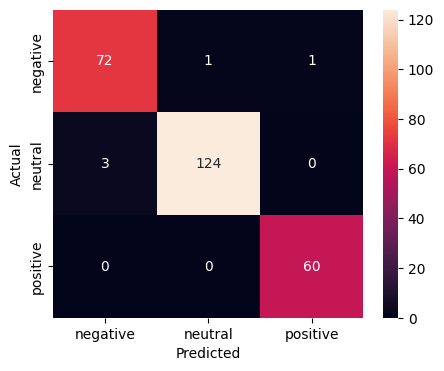

In [ ]:
plot_confusion_matrix(y_train_glove, y_pred_train_glove_tuned)

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove_tuned))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97        74
           0       0.99      0.98      0.98       127
           1       0.98      1.00      0.99        60

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



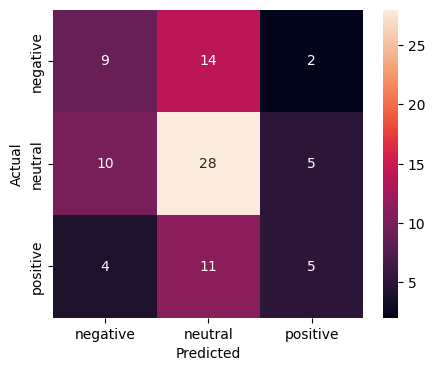

In [ ]:
plot_confusion_matrix(y_test_glove, y_pred_test_glove_tuned)

In [ ]:
print(classification_report(y_test_glove, y_pred_test_glove_tuned))

              precision    recall  f1-score   support

          -1       0.39      0.36      0.38        25
           0       0.53      0.65      0.58        43
           1       0.42      0.25      0.31        20

    accuracy                           0.48        88
   macro avg       0.45      0.42      0.42        88
weighted avg       0.46      0.48      0.46        88



### **Random Forest Classifier with Sentence Transformer**

In [ ]:
# Storing independent variable
X_SBERT = df_SBERT.copy()

# Storing target variable
y_SBERT = data.Label

# Split data into training and testing set.
X_train_SBERT, X_test_SBERT, y_train_SBERT, y_test_SBERT = train_test_split(X_SBERT, y_SBERT, test_size = 0.25, random_state = 42, stratify=y_SBERT)

In [ ]:
# Building the model

rf_SBERT = RandomForestClassifier(n_estimators = 100, max_depth = 11, random_state = 42)
# Fitting on train data
rf_SBERT.fit(X_train_SBERT, y_train_SBERT)

RandomForestClassifier(max_depth=11, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_SBERT = rf_SBERT.predict(X_train_SBERT)

# Predicting on test data
y_pred_test_SBERT = rf_SBERT.predict(X_test_SBERT)

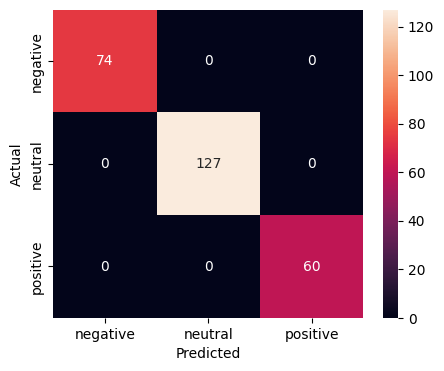

In [ ]:
plot_confusion_matrix(y_train_SBERT, y_pred_train_SBERT)

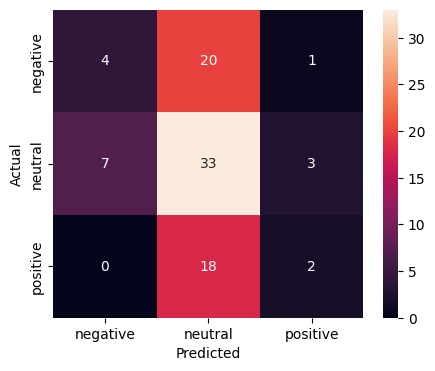

In [ ]:
plot_confusion_matrix(y_test_SBERT, y_pred_test_SBERT)

#### **RF Tuned with Grid Search**

In [ ]:
# Choose the type of classifier.
SBERT_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(10,15,2)),
    'n_estimators': np.arange(50,120,25),
    'max_features': [0.5,0.7]
}

# Run the grid search
grid_obj = GridSearchCV(SBERT_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_SBERT, y_train_SBERT)

# Set the clf to the best combination of parameters
SBERT_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
SBERT_rf_tuned.fit(X_train_SBERT, y_train_SBERT)

RandomForestClassifier(class_weight='balanced', max_depth=np.int64(10),
                       max_features=0.5, n_estimators=np.int64(50),
                       random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_SBERT_tuned = SBERT_rf_tuned.predict(X_train_SBERT)

# Predicting on test data
y_pred_test_SBERT_tuned = SBERT_rf_tuned.predict(X_test_SBERT)

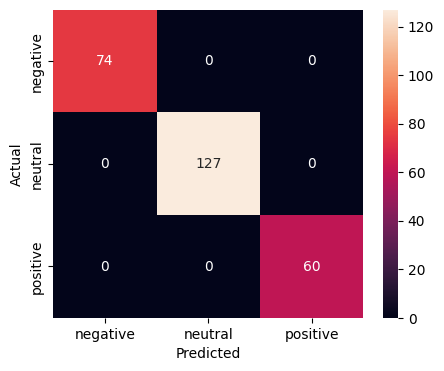

In [ ]:
plot_confusion_matrix(y_train_SBERT, y_pred_train_SBERT_tuned)

In [ ]:
print(classification_report(y_train_SBERT, y_pred_train_SBERT_tuned))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        74
           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00        60

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



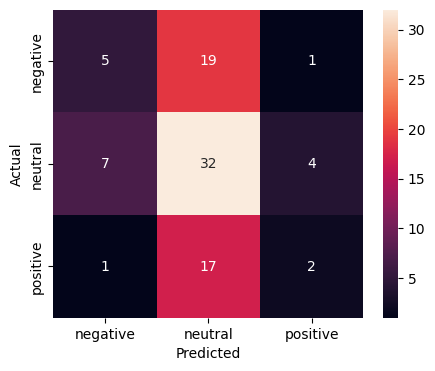

In [ ]:
plot_confusion_matrix(y_test_SBERT, y_pred_test_SBERT_tuned)

In [ ]:
print(classification_report(y_test_SBERT, y_pred_test_SBERT_tuned))

              precision    recall  f1-score   support

          -1       0.38      0.20      0.26        25
           0       0.47      0.74      0.58        43
           1       0.29      0.10      0.15        20

    accuracy                           0.44        88
   macro avg       0.38      0.35      0.33        88
weighted avg       0.40      0.44      0.39        88



**Accuracy**

In [ ]:
train_accuracy_Word2vec, test_accuracy_Word2Vec, train_accuracy_GloVe, test_accuracy_GloVe = 1,0.52277777, 1,0.477272727

In [ ]:
train_accuracy_Word2vec = accuracy_score(y_train_w2v,y_pred_train_w2v)
train_accuracy_Word2vec

1.0

In [ ]:
test_accuracy_Word2Vec = accuracy_score(y_test_glove,y_pred_test_glove)
test_accuracy_Word2Vec

0.5227272727272727

In [ ]:
train_accuracy_GloVe = accuracy_score(y_train_glove,y_pred_train_glove)
train_accuracy_GloVe

1.0

In [ ]:
test_accuracy_GloVe = accuracy_score(y_test_glove,y_pred_test_glove_tuned)
test_accuracy_GloVe

0.4772727272727273

In [ ]:
train_accuracy_SBERT = accuracy_score(y_train_SBERT,y_pred_train_SBERT)
train_accuracy_SBERT

1.0

In [ ]:
test_accuracy_SBERT = accuracy_score(y_test_SBERT,y_pred_test_SBERT)
test_accuracy_SBERT

0.4431818181818182

### **Model Comparison**

In [ ]:
# Create a DataFrame
model_comp = {
    'Model': ['Word2Vec', 'GloVe', 'Sentence Transformer'],
    'Train Accuracy': [train_accuracy_Word2vec, train_accuracy_GloVe, train_accuracy_SBERT],
    'Test Accuracy': [test_accuracy_Word2Vec, test_accuracy_GloVe, test_accuracy_SBERT]
}

# Creating the DataFrame
model_comp_df = pd.DataFrame(model_comp)

model_comp_df

Model  Train Accuracy  Test Accuracy
0              Word2Vec             1.0       0.522778
1                 GloVe             1.0       0.477273
2  Sentence Transformer             1.0       0.443182

Word2Vec still shows the best Accuracy for Sentiment Analysis

## **Weekly News Summarization**

#### Installing and Importing the necessary libraries

In [1]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

Mounted at /content/drive


In [2]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 214.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 212.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 194.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 256.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 185.6 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.45-cp311-cp311-linux_x86_64.whl size=23085752 sha256=19eafa9fce003086e41c59893057337b263d83a5a41a6389a74cec89290d47c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-l4v29sel/wheels/d0/7b/c8/2cb342a6cc0f730fdcddcab9fe5510c8de2ec556b155f8bb5d
Successfully built llama-cpp

In [3]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

In [4]:
os.listdir()

['E-News Express Project.ipynb',
 'FoodHub_Project_Etisha_Gurav.ipynb',
 'Credit Card Churn Prediction.ipynb',
 'Introduction to Neural Networks.ipynb',
 'EasyVisa.ipynb',
 'Trade&Ahead.ipynb',
 'INNHotelsGroup.csv',
 'SQL',
 'Solution',
 'Data',
 'best_model_weights_Part1.h5',
 'Hint - CV - 2_Part 2_.ipynb',
 'best_model_weights_Part1.keras',
 'embeddings.npy',
 'best_model_weights_Part1_new.keras',
 'copy_confusion_matrix.png',
 'PINS',
 'yolov5',
 'yolov5s.pt',
 'dataset',
 'dataset.yaml',
 'embeddings_tqdm.npy',
 'training_images',
 'face_mask_metadata.csv',
 'Computer Vision-PartB.ipynb',
 'glove.6B.100d.txt.word2vec',
 'INN Hotels.ipynb',
 'NLP_Project_Full_Code-1_old.ipynb',
 'NLP_Project_Full_Code_1.ipynb']

#### Loading the data

In [5]:
data = pd.read_csv("Data/stock_news.csv")

In [6]:
data.head()

Date                                               News       Open  \
0  2019-01-02   The tech sector experienced a significant dec...  41.740002   
1  2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2  2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3  2019-01-02   This news article reports that yields on long...  41.740002   
4  2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume  Label  
0  42.244999  41.482498  40.246914  130672400     -1  
1  42.244999  41.482498  40.246914  130672400     -1  
2  42.244999  41.482498  40.246914  130672400     -1  
3  42.244999  41.482498  40.246914  130672400     -1  
4  42.244999  41.482498  40.246914  130672400     -1

#### Loading the model

In [7]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [8]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [9]:
lcpp_llm = Llama(
    model_path=model_path,
    # n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43,  # uncomment and change this value based on GPU VRAM pool.
    n_ctx=5000,  # Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [10]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [11]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [12]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [13]:
weekly_grouped.head()

Date                                               News
0 2019-01-06   The tech sector experienced a significant dec...
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...
2 2019-01-20   The U.S. stock market declined on Monday as c...
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...

In [14]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

In [15]:
data_1.shape

(18, 2)

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [16]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

Define the instruction for the task (the task is to identify the top three positive and negative events from the week that are likely to impact the stock price)

In [17]:
instruction = """You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifically on identifying **events** — such as product launches, earnings reports, mergers, partnerships, leadership changes, scandals, or regulatory actions.
5. After analyzing all the articles:
    a. Select the **top 3 positive events** most likely to lead to a **rise** in the company's stock price.
    b. Select the **top 3 negative events** most likely to lead to a **decline** in the stock price.

These are the news articles:
{news}
Return the output in JSON format with keys as the "positive" or "negative" and values as the top 3 events.
{{"positive":"List of 3 positive news events",
 "negative":"List of 3 negative news events"}}"""

In [23]:
def generate_llama_response(news, prompt = instruction):

    # System message explicitly instructing not to include the review text
    system_message = f"""
        [INST]<<SYS>>
        {instruction}
        <</SYS>>[/INST]
    """
    prompt = f"""
[INST] <<SYS>>
{instruction}
<</SYS>>

These are the weekly news articles:
{news}
[/INST]
"""
    print(prompt)
    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=0.95,
        top_k=50,
        echo=False,
        seed=42,
        repeat_penalty=1.1,
    )

    # Extract the sentiment from the response
    final_output = response["choices"][0]["text"]
    return final_output

##### Checking the model output on a sample

In [19]:
model_output = generate_llama_response(data_1["News"][0])
# model_output


[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     126.95 ms /   205 runs   (    0.62 ms per token,  1614.77 tokens per second)
llama_print_timings: prompt eval time =    5015.00 ms /  4134 tokens (    1.21 ms per token,   824.33 tokens per second)
llama_print_timings:        eval time =    8041.32 ms /   204 runs   (   39.42 ms per token,    25.37 tokens per second)
llama_print_timings:       total time =   14059.94 ms /  4338 tokens


In [22]:
extract_json_data(model_output["choices"][0]["text"])

{'positive': ['Apple CEO Tim Cook announced plans for Apple to offer premium video channels on The Roku Channel (January 2019)',
  'RBC Capital maintains bullish stance on Apple with a $220 price target (January 2019)',
  'Oil prices rebounded due to dollar weakness, signs of output cuts by Saudi Arabia, and weaker fuel oil margins (January 2019)'],
 'negative': ['Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion (January 2019)',
  "Apple's revenue warning led to significant declines in tech indices such as Nasdaq 100 (January 2019)",
  "Fears of a global economic slowdown following Apple's revenue warning led to significant losses for US dollar against Japanese yen (January 2019)"]}

##### Checking the model output on the weekly data

In [24]:
data_1["Model_output"] = data_1["News"].progress_apply(generate_llama_response)

  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      72.84 ms /   134 runs   (    0.54 ms per token,  1839.75 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    5494.16 ms /   134 runs   (   41.00 ms per token,    24.39 tokens per second)
llama_print_timings:       total time =    5990.90 ms /   135 tokens
 11%|█         | 2/18 [00:06<00:48,  3.01s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     108.15 ms /   178 runs   (    0.61 ms per token,  1645.91 tokens per second)
llama_print_timings: prompt eval time =    2592.96 ms /  2232 tokens (    1.16 ms per token,   860.79 tokens per second)
llama_print_timings:        eval time =    6601.33 ms /   177 runs   (   37.30 ms per token,    26.81 tokens per second)
llama_print_timings:       total time =    9999.04 ms /  2409 tokens
 17%|█▋        | 3/18 [00:16<01:28,  5.93s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      98.90 ms /   165 runs   (    0.60 ms per token,  1668.35 tokens per second)
llama_print_timings: prompt eval time =    2470.39 ms /  2087 tokens (    1.18 ms per token,   844.81 tokens per second)
llama_print_timings:        eval time =    6131.66 ms /   164 runs   (   37.39 ms per token,    26.75 tokens per second)
llama_print_timings:       total time =    9314.06 ms /  2251 tokens
 22%|██▏       | 4/18 [00:25<01:40,  7.20s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      51.71 ms /    95 runs   (    0.54 ms per token,  1837.31 tokens per second)
llama_print_timings: prompt eval time =    1629.31 ms /  1473 tokens (    1.11 ms per token,   904.07 tokens per second)
llama_print_timings:        eval time =    3490.45 ms /    94 runs   (   37.13 ms per token,    26.93 tokens per second)
llama_print_timings:       total time =    5442.05 ms /  1567 tokens
 28%|██▊       | 5/18 [00:30<01:25,  6.60s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     101.22 ms /   127 runs   (    0.80 ms per token,  1254.71 tokens per second)
llama_print_timings: prompt eval time =    3377.13 ms /  2585 tokens (    1.31 ms per token,   765.44 tokens per second)
llama_print_timings:        eval time =    4987.68 ms /   126 runs   (   39.58 ms per token,    25.26 tokens per second)
llama_print_timings:       total time =    9144.31 ms /  2711 tokens
 33%|███▎      | 6/18 [00:40<01:29,  7.45s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     558.28 ms /   270 runs   (    2.07 ms per token,   483.63 tokens per second)
llama_print_timings: prompt eval time =    1343.82 ms /  1081 tokens (    1.24 ms per token,   804.43 tokens per second)
llama_print_timings:        eval time =   10105.08 ms /   269 runs   (   37.57 ms per token,    26.62 tokens per second)
llama_print_timings:       total time =   13895.03 ms /  1350 tokens
 39%|███▉      | 7/18 [00:53<01:44,  9.53s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      81.97 ms /   152 runs   (    0.54 ms per token,  1854.25 tokens per second)
llama_print_timings: prompt eval time =    1449.48 ms /  1269 tokens (    1.14 ms per token,   875.48 tokens per second)
llama_print_timings:        eval time =    5614.67 ms /   151 runs   (   37.18 ms per token,    26.89 tokens per second)
llama_print_timings:       total time =    7571.81 ms /  1420 tokens
 44%|████▍     | 8/18 [01:01<01:29,  8.92s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     134.03 ms /   224 runs   (    0.60 ms per token,  1671.32 tokens per second)
llama_print_timings: prompt eval time =     732.15 ms /   568 tokens (    1.29 ms per token,   775.79 tokens per second)
llama_print_timings:        eval time =    8154.62 ms /   223 runs   (   36.57 ms per token,    27.35 tokens per second)
llama_print_timings:       total time =    9787.30 ms /   791 tokens
 50%|█████     | 9/18 [01:11<01:22,  9.19s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      99.55 ms /   156 runs   (    0.64 ms per token,  1567.04 tokens per second)
llama_print_timings: prompt eval time =     836.95 ms /   652 tokens (    1.28 ms per token,   779.02 tokens per second)
llama_print_timings:        eval time =    5759.28 ms /   155 runs   (   37.16 ms per token,    26.91 tokens per second)
llama_print_timings:       total time =    7262.29 ms /   807 tokens
 56%|█████▌    | 10/18 [01:18<01:08,  8.60s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      75.82 ms /   139 runs   (    0.55 ms per token,  1833.27 tokens per second)
llama_print_timings: prompt eval time =     883.48 ms /   724 tokens (    1.22 ms per token,   819.48 tokens per second)
llama_print_timings:        eval time =    5505.75 ms /   138 runs   (   39.90 ms per token,    25.06 tokens per second)
llama_print_timings:       total time =    6849.71 ms /   862 tokens
 61%|██████    | 11/18 [01:25<00:56,  8.07s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      99.98 ms /   162 runs   (    0.62 ms per token,  1620.36 tokens per second)
llama_print_timings: prompt eval time =    1389.29 ms /  1136 tokens (    1.22 ms per token,   817.68 tokens per second)
llama_print_timings:        eval time =    6426.86 ms /   161 runs   (   39.92 ms per token,    25.05 tokens per second)
llama_print_timings:       total time =    8517.51 ms /  1297 tokens
 67%|██████▋   | 12/18 [01:33<00:49,  8.21s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     129.26 ms /   216 runs   (    0.60 ms per token,  1671.10 tokens per second)
llama_print_timings: prompt eval time =    1516.10 ms /  1261 tokens (    1.20 ms per token,   831.74 tokens per second)
llama_print_timings:        eval time =    8553.51 ms /   215 runs   (   39.78 ms per token,    25.14 tokens per second)
llama_print_timings:       total time =   10989.52 ms /  1476 tokens
 72%|███████▏  | 13/18 [01:44<00:45,  9.06s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      71.63 ms /   132 runs   (    0.54 ms per token,  1842.80 tokens per second)
llama_print_timings: prompt eval time =    2016.11 ms /  1654 tokens (    1.22 ms per token,   820.39 tokens per second)
llama_print_timings:        eval time =    5319.50 ms /   131 runs   (   40.61 ms per token,    24.63 tokens per second)
llama_print_timings:       total time =    7858.11 ms /  1785 tokens
 78%|███████▊  | 14/18 [01:52<00:34,  8.70s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     118.21 ms /   195 runs   (    0.61 ms per token,  1649.61 tokens per second)
llama_print_timings: prompt eval time =    1018.94 ms /   868 tokens (    1.17 ms per token,   851.87 tokens per second)
llama_print_timings:        eval time =    7145.42 ms /   194 runs   (   36.83 ms per token,    27.15 tokens per second)
llama_print_timings:       total time =    9005.60 ms /  1062 tokens
 83%|████████▎ | 15/18 [02:01<00:26,  8.80s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      69.84 ms /   126 runs   (    0.55 ms per token,  1803.99 tokens per second)
llama_print_timings: prompt eval time =     527.68 ms /   505 tokens (    1.04 ms per token,   957.02 tokens per second)
llama_print_timings:        eval time =    4634.72 ms /   125 runs   (   37.08 ms per token,    26.97 tokens per second)
llama_print_timings:       total time =    5591.08 ms /   630 tokens
 89%|████████▉ | 16/18 [02:07<00:15,  7.84s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     123.13 ms /   218 runs   (    0.56 ms per token,  1770.43 tokens per second)
llama_print_timings: prompt eval time =    1691.64 ms /  1444 tokens (    1.17 ms per token,   853.61 tokens per second)
llama_print_timings:        eval time =    8558.28 ms /   217 runs   (   39.44 ms per token,    25.36 tokens per second)
llama_print_timings:       total time =   11066.96 ms /  1661 tokens
 94%|█████████▍| 17/18 [02:18<00:08,  8.81s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =     107.70 ms /   172 runs   (    0.63 ms per token,  1597.07 tokens per second)
llama_print_timings: prompt eval time =    1018.54 ms /   868 tokens (    1.17 ms per token,   852.20 tokens per second)
llama_print_timings:        eval time =    6328.74 ms /   171 runs   (   37.01 ms per token,    27.02 tokens per second)
llama_print_timings:       total time =    8083.83 ms /  1039 tokens
100%|██████████| 18/18 [02:26<00:00,  8.60s/it]Llama.generate: prefix-match hit



[INST] <<SYS>>
You are a financial data analyst and market news expert specializing in analyzing the impact of company-related news on stock prices. Your expertise lies in evaluating financial news articles, identifying key events, assessing sentiment, and determining how those events could influence market behavior.

Task: Analyze a set of news articles related to a specific company from a given week. Identify and extract the top three positive and top three negative events that are most likely to significantly affect the company's stock price. These insights will help financial analysts make informed investment decisions and refine stock prediction strategies.

Instructions:
1. You will be given a set of news articles for a specific company covering one week of news.
2. Read and analyze each article to understand its context, tone, and implications.
3. For each article, evaluate the sentiment as Positive, Negative, or Neutral based on the expected market reaction.
4. Focus specifica


llama_print_timings:        load time =     660.54 ms
llama_print_timings:      sample time =      91.91 ms /   160 runs   (    0.57 ms per token,  1740.93 tokens per second)
llama_print_timings: prompt eval time =    1023.12 ms /   868 tokens (    1.18 ms per token,   848.39 tokens per second)
llama_print_timings:        eval time =    6038.97 ms /   159 runs   (   37.98 ms per token,    26.33 tokens per second)
llama_print_timings:       total time =    7651.53 ms /  1027 tokens
100%|██████████| 18/18 [02:34<00:00,  8.57s/it]


In [25]:
data_1.head()

Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                        Model_output  
0  {"positive": ["Apple announces plans to offer ...  
1  {"positive": ["Sprint and Samsung's plan to re...  
2  {"positive": ["Dialog Semiconductor reports re...  
3  {"positive": ["IBM's better-than-expected earn...  
4  {"positive": ["Apple reported stronger-than-ex...

##### Formatting the model output

In [26]:
data_1["positive"] = data_1["Model_output"].apply(lambda x: extract_json_data(x)["positive"])
data_1["negative"] = data_1["Model_output"].apply(lambda x: extract_json_data(x)["negative"])

In [27]:
data_1.head()

Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                        Model_output  \
0  {"positive": ["Apple announces plans to offer ...   
1  {"positive": ["Sprint and Samsung's plan to re...   
2  {"positive": ["Dialog Semiconductor reports re...   
3  {"positive": ["IBM's better-than-expected earn...   
4  {"positive": ["Apple reported stronger-than-ex...   

                                            positive  \
0  [Apple announces plans to offer premium video ...   
1  [Sprint and Samsung's plan to release 5G smart...   
2  [Dialog Semiconductor reports revenue in line ...   
3  [IBM's better-than-expected earnings and reven...   
4  [Apple reported stronger-than-expected earning...   

                                            negative  
0  [Apple lowers fiscal Q1 revenue guidance due t...  
1  [Geely's forecast of flat sales for 2019 due t...  
2  [Chinese Academy of Social Sciences (CASS) cri...  
3  [Swiss National Bank's emphasis on negative in...  
4  [Caterpillar Inc reported lower-than-expected ...

## **Conclusions and Recommendations**

## **Observations and Insights:**

* **Stock Price Correlation**: The strong correlation among Open, High, Low, and Close prices is a standard characteristic of daily stock data. This suggests that using all four as independent features in a predictive model might lead to multicollinearity issues.
* **News Volume**: The distribution of the number of words and characters in the news content indicates that most news articles are concise, with a relatively small number of longer articles.
* **Sentiment Distribution**: The dataset shows a notable number of neutral news articles. This is important because neutral sentiment might still have some influence on stock prices, or it could be a category that needs further investigation or potentially combining with other categories if a clear impact isn't observed.
* **Lack of Strong Correlation between News Length and Price**: The absence of a strong correlation between the length of news articles and stock prices (Open, High, Low, Close) suggests that the impact of news is more about the content and sentiment than the sheer volume of text.
* **Limited Predictive Power of Current Sentiment Models**: The low test accuracy of the sentiment classification models (regardless of embedding method) highlights that accurately predicting sentiment from the raw text with the current approach and dataset size is challenging. Overfitting is a significant issue.
* **Potential of LLMs for Summarization**: The ability of the LLM to generate weekly summaries and extract potential positive and negative events demonstrates its capability in processing and synthesizing information from multiple news sources. This is a valuable insight for the business in terms of automating news analysis.

##**Recommendations for the Business**:

* **Prioritize Data Acquisition**: The most critical recommendation is to acquire a larger and more diverse dataset of historical news and stock prices. This will be fundamental to building more robust and generalizable sentiment analysis and predictive models. Consider sourcing data from various financial news providers and for different companies to increase the dataset size and representativeness.
* **Focus on Context and Nuance**: Instead of just relying on simple word embeddings, explore more sophisticated techniques for sentiment analysis that capture the context and nuances of financial language. This could involve using fine-tuned transformer models or incorporating financial sentiment lexicons.
* **Focus on High-Impact News**: Investigate if certain types of news articles (e.g., earnings reports, regulatory announcements) have a stronger correlation with stock price movements and potentially prioritize these in the analysis.
* **Leverage LLM Summaries**: Integrate the LLM-generated weekly summaries into the investment analysis process. These summaries can provide a quick overview of key events and inform financial analysts about potential drivers of stock price changes.
* **Develop a Predictive Model**: Shift the focus towards building a predictive model that forecasts stock prices based on a combination of:
  * Historical stock price data (time series analysis).
  * Sentiment scores from the refined sentiment analysis model.
  * Key events extracted from the LLM summaries.
Consider External Factors: While news is crucial, acknowledge that other external factors (e.g., macroeconomic indicators, industry trends, competitor news) also influence stock prices. Explore ways to incorporate these factors into the analysis and predictive modeling.


